In [12]:
### import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd 
import feather as ft 
import random 
import numpy as np
import statistics
import copy 
import networkx as nx

df=ft.read_dataframe('table_all.feather')

dc_Meso_index= pd.read_excel('dc_Meso_index.xlsx').set_index('Mesoregion') 
center_list_code=list(dc_Meso_index.loc[['Central Mineira','Metropolitana de Belo Horizonte'],'city_code']) 
north_list_code=list(dc_Meso_index.loc[['Noroeste de Minas','Norte de Minas'],'city_code']) 
east_list_code=list(dc_Meso_index.loc[['Jequitinhonha','Vale do Mucuri','Vale do Rio Doce'],'city_code']) 
south_list_code=list(dc_Meso_index.loc[['Campo das Vertentes','Oeste de Minas','Sul/​Sudoeste de Minas','Zona da Mata'],'city_code']) 
west_list_code=list(dc_Meso_index.loc[['Triângulo Mineiro/​Alto Paranaiba'],'city_code'])

'''
df_city_code_latitude_longitude=pd.read_excel('df_city_code_latitude_longitude.xlsx',index_col=0)
list_municipality_code= df_city_code_latitude_longitude['municipality_code'].tolist()'''

"\ndf_city_code_latitude_longitude=pd.read_excel('df_city_code_latitude_longitude.xlsx',index_col=0)\nlist_municipality_code= df_city_code_latitude_longitude['municipality_code'].tolist()"

In [10]:
df.iloc[0]

Serie_e_Numero_da_GTA                        b'B - 291012'
Data_de_emissao                 b'2013/09/05 12:41:13.615'
Especie                                          b'BOVINO'
Finalidade                                   b'REPRODUCAO'
Meio_de_Transporte                                 b'A PE'
Machos_De_0_a_12                                         8
Femeas_De_0_a_12                                         7
Machos_De_13_a_24                                        5
Femeas_De_13_a_24                                        6
Machos_De_25_a_36                                        0
Femeas_De_25_a_36                                        7
Machos_Acima_De_36                                       2
Femeas_Acima_De_36                                      24
UF_de_Origem                                         b'MG'
Codigo_Municipio_de_Origem                         3130804
Codigo_do_Local_de_Origem                   b'31308040094'
Nome_do_Local_de_Origem                 b'FAZ PEDRA PRET

In [13]:
sample=df.iloc[:,[1,13,14,15,17,18,19,21,22,30,32]] #part of data that we need including

#remove importation exportation        
#remove importation exportation        
sample=sample.set_index('UF_de_Origem') 
sample=sample.loc[b'MG']
sample=sample.reset_index()
sample=sample.set_index('UF_de_Destino') 
sample=sample.loc[b'MG']
sample=sample.reset_index()


sample=sample.set_index('ano') 
sample=sample.loc[2013]
sample=sample.reset_index()
sample=sample.loc[sample['MONTH']<7] 
sample=sample.reset_index()
 
origin_code=sample['Codigo_do_Local_de_Origem'] #all origins in dataset_include itterable name len(origin_code) is not equal to the length of origin node in network(len(origin_code_unique)) 
destination_code=sample['Codigo_do_Local_de_Destino'] #all destinations in dataset_include itterable name 
origin_municipality_code=sample['Codigo_Municipio_de_Origem'] 
destination_municipality_code=sample['Codigo_Municipio_de_Destino']
number_animal=sample['animais']
#T_type=sample['Finalidade']


for i in range(len(origin_code)):
    if origin_code[i]== destination_code[i]:
        sample=sample.drop(i,axis=0)
        
        
        
#make a network        
DG=nx.DiGraph()       
for i in range(len(origin_code)):
    if origin_code[i] not in DG.nodes():
        city_code=origin_municipality_code[i]
        DG.add_node(origin_code[i], c_code=city_code)
        #find index of an element in a pandas DataFrame
        #if city_code in list_municipality_code:
        #    j=list(df_city_code_latitude_longitude[df_city_code_latitude_longitude['municipality_code']==city_code].index.values)[0]
        #    DG.nodes[origin_code[i]]['latitude']=df_city_code_latitude_longitude.iloc[j,1]
        #    DG.nodes[origin_code[i]]['longitude']=df_city_code_latitude_longitude.iloc[j,2]
        if city_code in center_list_code:
            DG.nodes[origin_code[i]]['region']='Center'
        if city_code in north_list_code:
            DG.nodes[origin_code[i]]['region']='North'
        if city_code in east_list_code:
            DG.nodes[origin_code[i]]['region']='East'
        if city_code in south_list_code:
            DG.nodes[origin_code[i]]['region']='South'
        if city_code in west_list_code:
            DG.nodes[origin_code[i]]['region']='West'   
    
    if destination_code[i] not in DG.nodes():
        city_code=destination_municipality_code[i]
        DG.add_node(destination_code[i], c_code=city_code)
        #if city_code in list_municipality_code:
        #    j=list(df_city_code_latitude_longitude[df_city_code_latitude_longitude['municipality_code']==city_code].index.values)[0]
        #    DG.nodes[destination_code[i]]['latitude']=df_city_code_latitude_longitude.iloc[j,1]
        #    DG.nodes[destination_code[i]]['longitude']=df_city_code_latitude_longitude.iloc[j,2]
        if city_code in center_list_code:
            DG.nodes[destination_code[i]]['region']='Center'
        if city_code in north_list_code:
            DG.nodes[destination_code[i]]['region']='North'
        if city_code in east_list_code:
            DG.nodes[destination_code[i]]['region']='East'
        if city_code in south_list_code:
            DG.nodes[destination_code[i]]['region']='South'
        if city_code in west_list_code:
            DG.nodes[destination_code[i]]['region']='West' 
    if (origin_code[i],destination_code[i]) not in DG.edges(): 
        DG.add_edge(origin_code[i],destination_code[i]) 
        DG.adj[origin_code[i]][destination_code[i]]['weight']=number_animal[i]
    else: DG.adj[origin_code[i]][destination_code[i]]['weight']+=number_animal[i]


In [291]:
def My_Epi_SI(Graph, initial_infecteds):
    G=copy.deepcopy(Graph)
    beta=0.001#0.001#0.02085574#0.00042337#0.00084674     #missinglink #0.00006864988#0.0006864988 #0.001144#0.00134228   #0.001121#0.002242           # weight_un=#0.00095969#0.00191938 #0.00136986# previous: 0.0027397
    infected = initial_infecteds.copy()
    N=G.order()
    i=201 #number of steps of iteration
    susceptible = list(G.nodes())
    
    for infected_node in infected:
        if infected_node in susceptible: 
            susceptible.remove(infected_node)
    
    num_infected_results=[]
    num_j=[]
    num_j.append([0,float(len(infected)/N)])
    num_infected_results.append(float(len(infected)/N))
    #Inicializar el tiempo
    t = 0
    j=1
    while j<i:
        infected_1 = list()
        #Realizar la infección
        for node in infected: 
            if len(set(G.neighbors(node)))>0:
                '''strategy here is that every time the first chance is get to the highest weight of edges in node neighbors. 
                if rhe neighbor with highest weight does not infect then the second chance is based on random sample choice'''
                neigh = list(G.neighbors(node))
                if len(neigh)==1:
                    nei=neigh[0]
                    #neigh=set(G.neighbors(node))
                    if  nei not in list(infected):
                        if  nei not in list(infected_1):
                            if random.random()<1-((1-beta)**G[node][nei]['weight']):
                                infected_1.append(nei)
                # if len(edges) > 0: #some nodes have zero edges going into it #this one could be useful in directed network
                else:
                    for nbr in set(G.neighbors(node)):
                        if nbr not in list(infected):
                            if  nbr not in list(infected_1):
                                if random.random()<1-((1-beta)**G[node][nbr]['weight']):
                                    infected_1.append(nbr)
        #Remover a los infectados de los susceptibles:
        infected += infected_1
        for infected_node in infected_1:
            if infected_node in susceptible: 
                susceptible.remove(infected_node)
            

        #Registrar el porcentaje de nodos infectados en una lista para luego graficar
        num_infected_results.append(float(len(infected)/N))
        num_j.append([j,float(len(infected)/N)])
        
        #Actualizar el tiempo
        j +=1
                            
    return num_infected_results,num_j


def get_data_My_SI(Graph, IN_IN):
    I,num_I_j=My_Epi_SI(Graph,IN_IN)
    I1=pd.DataFrame(list(I), columns=['vals'])
    return I1
def multiran_result_SI(Graph,IN_IN):
    dfs_un=pd.DataFrame(list(range(0,201)), columns=['time'])
    for i in range(1,11):
        #time.sleep(5)
        df_un=get_data_My_SI(Graph,IN_IN)
        dfs_un.insert(i, f"vals_{i}", df_un) 
    df_all_un= dfs_un.set_index('time')
    mean_val_un = df_all_un.iloc[:,0:].mean(axis=1)
    std_val_un= df_all_un.iloc[:,0:].std(axis=1)
    min_val_un = mean_val_un - 2*std_val_un
    max_val_un = mean_val_un + 2*std_val_un
    df_all_un.reset_index(inplace = True)
    
    return df_all_un ,  mean_val_un, min_val_un,  max_val_un

def make_node_region_list(Graph,region):
    G=copy.deepcopy(Graph)
    region=str(region)
    list_node_region=[node for node,info in G.nodes(data=True) if info['region']==region]
    return list_node_region 
    
def add_un_to_edge_weight_just(a,region,DG): 
    DG_IT=copy.deepcopy(DG) 
    region=str(region)
    for (u,v) in DG_IT.edges(): 
        if DG_IT.nodes[u]['region']==region:
            if DG_IT.nodes[v]['region']==region:
                DG_IT[u][v]['weight']=int(DG_IT[u][v]['weight']*a/100) + DG_IT[u][v]['weight']
    return DG_IT 
def change_weight_entire_just(Graph,a):
    G1=Graph.copy()
    for (u,v) in G1.edges():
        G1[u][v]['weight']+=int(G1[u][v]['weight']*(random.randrange(1,a+1)/100))
    return G1


def add_missing_link_entire(Graph,a):
    G_o=copy.deepcopy(Graph)
    G1=copy.deepcopy(Graph)
    N_missing_link=int((a*0.01)*G1.number_of_edges())
    list_node_tuple=[]
    for j in range(N_missing_link):
        one_tuple=list(random.sample(list(G1.nodes()), 2))
        list_node_tuple.append((one_tuple[0],one_tuple[1]))
        
    #list_node_tuple=[(u,v) for u in list(random.sample(list(G1.nodes()), N_missing_link)) and v in list(random.sample(list(G1.nodes()), N_missing_link))]
    for (u,v) in list_node_tuple:
        if (u,v) not in G1.edges():
            list_neigh=list(G_o.edges(u,data=True))#make a list of weights of the edges incident to this node in the original network without missing link
            list_w=[item[2]['weight'] for item in list_neigh]
            G1.add_edge(u,v)
            
            if len(list_neigh)==0:
                G1[u][v]['weight']=list(random.sample(list_weights, 1))[0]
            #if node has neighbors we choose weight for missing link based on weights of other edges of node
            else:
                G1.adj[u][v]['weight']=list(random.sample(list_w, 1))[0]
                
        else:
            G1[u][v]['weight']+= int(G1[u][v]['weight']*(a/100))
            
          
    return G1

def add_missing_link(a,list_n,Graph):
    G_o=copy.deepcopy(Graph)
    G1=copy.deepcopy(Graph)
    n_edge_region=0
    for n in list_n:
        for n1 in list_n:
            n_edge_region=G_o.number_of_edges(n,n1)+ n_edge_region
    N_missing_link=int((a*0.01)*n_edge_region)
    for i in range(N_missing_link):
        node_tuple=random.sample(list_n, 2)#I used random.sample instead of random.choice
                                            #because randome.sample do not allow repitition so it avoid self loop here
                                             
        if (node_tuple[0],node_tuple[1]) not in G1.edges():
            #first find the mean of weights of edges this node have
           #be careful if you first add new edge you will get erros in calculating mean of weight of edges
            list_neigh=list(G_o.edges(node_tuple[0],data=True))#make a list of weights of the edges incident to this node in the original network without missing link
            list_w=[item[2]['weight'] for item in list_neigh]
            G1.add_edge(node_tuple[0],node_tuple[1])
            #If node in original network do not have any edges and it is isolated
            if len(list_neigh)==0:
                G1[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_weights, 1))[0]
            #if node has neighbors we choose weight for missing link based on weights of other edges of node
            else:
                G1.adj[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_w, 1))[0]
            
        else:
            G1[node_tuple[0]][node_tuple[1]]['weight']+=int(G1[node_tuple[0]][node_tuple[1]]['weight']*(a/100))
       #(random.randrange(1,a+1)/100))
    return G1
def add_missing_link_special(a,list_n,Graph):
    G1=copy.deepcopy(Graph)
    number_of_edge=0
    for node1 in list_n:
        for node2 in list_n:
            if (node1,node2) in G1.edges():
                number_of_edge+=1
                
        
    N_missing_link=int((a*0.01)*number_of_edge)
    for i in range(N_missing_link):
        node_tuple=random.sample(list_n, 2)#I used random.sample instead of random.choice
                                            #because randome.sample do not allow repitition so it avoid self loop here
                                             
        if (node_tuple[0],node_tuple[1]) not in G1.edges():
            G1.add_edge(node_tuple[0],node_tuple[1])
            G1.adj[node_tuple[0]][node_tuple[1]]['weight']=random.randint(1, 30)# this one should be select based on the distribution for the weight of the network was used
            
        else:
            G1[node_tuple[0]][node_tuple[1]]['weight']+=int(G1[node_tuple[0]][node_tuple[1]]['weight']*(random.randrange(1,a+1)/100))
        
    return G1



In [227]:
#DG_c_10=add_un_to_edge_weight(10,'Center',DG)
#DG_n_10=add_un_to_edge_weight(10,'North',DG)
#DG_s_10=add_un_to_edge_weight(10,'South',DG)
DG_w_10=add_un_to_edge_weight(10,'West',DG)
DG_e_10=add_un_to_edge_weight(10,'East',DG)
#DG_c_50=add_un_to_edge_weight(50,'Center',DG)
#DG_n_50=add_un_to_edge_weight(50,'North',DG)
#DG_s_50=add_un_to_edge_weight(50,'South',DG)
DG_w_50=add_un_to_edge_weight(50,'West',DG)
DG_e_50=add_un_to_edge_weight(50,'East',DG)
DG_10=change_weight_entire(DG,10)
DG_50=change_weight_entire(DG,50)

In [228]:
#nx.write_gpickle(DG, "real_network/G_O_6_month.gpickle")
nx.write_gpickle(DG_w_10, "real_network/G_unw_w_just10.gpickle")
nx.write_gpickle(DG_e_10, "real_network/G_unw_e_just10.gpickle")
nx.write_gpickle(DG_10, "real_network/G_unw_entire_just10.gpickle")
nx.write_gpickle(DG_w_50, "real_network/G_unw_w_just50.gpickle")
nx.write_gpickle(DG_e_50, "real_network/G_unw_e_just50.gpickle")
nx.write_gpickle(DG_50, "real_network/G_unw_entire_just50.gpickle")

In [30]:
list_west_nodes=make_node_region_list(DG,'West')
list_east_nodes=make_node_region_list(DG,'East')

In [15]:
miss_DG_w_10=add_missing_link(10,list_west_nodes,DG)
miss_DG_e_10=add_missing_link(10,list_east_nodes,DG)
miss_DG_w_50=add_missing_link(30,list_west_nodes,DG)
miss_DG_e_50=add_missing_link(30,list_east_nodes,DG)
miss_DG_10=add_missing_link_entire(DG,10)
miss_DG_50=add_missing_link_entire(DG,30)

In [57]:
IN_IN_center=random.sample(make_node_region_list(DG,'Center'),10)
IN_IN_north=random.sample(make_node_region_list(DG,'North'),10)
IN_IN_east=random.sample(make_node_region_list(DG,'East'),10)
IN_IN_south=random.sample(make_node_region_list(DG,'South'),10)
IN_IN_west=random.sample(make_node_region_list(DG,'West'),10)
#IN_IN_risk_region=random.sample(make_node_region_list(DG,'East'),10)+random.sample(make_node_region_list(DG,'West'),10)

In [182]:
IN_IN_risk_region=random.sample(make_node_region_list(DG,'East'),1000)+random.sample(make_node_region_list(DG,'West'),1000)
IN_IN_risk_region1=random.sample(make_node_region_list(DG,'East'),100)+random.sample(make_node_region_list(DG,'West'),100)

In [ ]:
#df, df_mean, df_min, df_max=multiran_result_SI(DG,IN_IN_risk_region)
df_un10_w5, df_un10_w_mean5, df_un10_w_min5,df_un10_w_max5=multiran_result_SI(DG_w_10,IN_IN_risk_region)
df_un50_w5, df_un50_w_mean5, df_un50_w_min5,df_un50_w_max5=multiran_result_SI(DG_w_50,IN_IN_risk_region)
df_un10_entire5, df_un10_entire_mean5, df_un10_entire_min5,df_un10_entire_max5=multiran_result_SI(DG_10,IN_IN_risk_region)
df_un50_entire5, df_un50_entire_mean5, df_un50_entire_min5,df_un50_entire_max5=multiran_result_SI(DG_50,IN_IN_risk_region)
df_un10_e5, df_un10_e_mean5, df_un10_e_min5,df_un10_e_max5=multiran_result_SI(DG_e_10,IN_IN_risk_region)
df_un50_e5, df_un50_e_mean5, df_un50_e_min5,df_un50_e_max5=multiran_result_SI(DG_e_50,IN_IN_risk_region)

In [22]:
#I1,df_1=My_Epi_SI(DG,IN_IN_risk_region)
#I2,df_un10_w1=My_Epi_SI(miss_DG_w_10,IN_IN_risk_region)
#I3,df_un30_w1=My_Epi_SI(miss_DG_w_50,IN_IN_risk_region)
#I4,df_un10_entire1=My_Epi_SI(miss_DG_10,IN_IN_risk_region)
#I5,df_un30_entire1=My_Epi_SI(miss_DG_50,IN_IN_risk_region)
#I6,df_un10_e1=My_Epi_SI(miss_DG_e_10,IN_IN_risk_region)
I7,df_un30_e1=My_Epi_SI(miss_DG_e_50,IN_IN_risk_region)

In [23]:
import pickle
with open ('real_network/epi_network_just10%_missPlusW_6_month_west', 'wb') as fp:
    pickle.dump(df_un10_w1, fp)
with open ('real_network/epi_network_just30%_missPlusW_6_month_west', 'wb') as fp:
    pickle.dump(df_un30_w1, fp)
with open ('real_network/epi_network_just10%_missPlusW_6_month_east', 'wb') as fp:
    pickle.dump(df_un10_e1, fp)
with open ('real_network/epi_network_just30%_missPlusW_6_month_east', 'wb') as fp:
    pickle.dump(df_un30_e1, fp)
with open ('real_network/epi_network_just10%_missPlusW_6_month_entire', 'wb') as fp:
    pickle.dump(df_un10_entire1, fp)
with open ('real_network/epi_network_just30%_missPlusW_6_month_entire', 'wb') as fp:
    pickle.dump(df_un30_entire1, fp)

In [25]:
#read files of just missing link
with open ('real_network/epi_network_just_10%_missing_link_6_month_west', 'rb') as fp:
    df_un10_miss_w=pickle.load(fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_west', 'rb') as fp:
    df_un30_miss_w=pickle.load(fp)
with open ('real_network/epi_network_just_10%_missing_link_6_month_east', 'rb') as fp:
    df_un10_miss_e=pickle.load(fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_east', 'rb') as fp:
    df_un30_miss_e=pickle.load(fp)
with open ('real_network/epi_network_just_10%_missing_link_6_month_entire', 'rb') as fp:
    df_un10_miss_entire=pickle.load(fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_entire', 'rb') as fp:
    df_un30_miss_entire=pickle.load(fp)

EOFError: Ran out of input

In [40]:
#I_10_w_M=df_un10_w[0:201]
#I_30_w_M=df_un30_w[0:201]
I_10_w_MPlusW=df_un10_w1
I_30_w_MPlusW=df_un30_w1
I_10_w_M=df_un10_w
I_30_w_M=df_un30_w
I_10_e_MPlusW=df_un10_e1
I_30_e_MPlusW=df_un30_e1
I_10_e_M=df_un10_e
I_30_e_M=df_un30_e
I_10_MPlusW=df_un10_entire1
I_30_MPlusW=df_un30_entire1
I_10_M=df_un10_entire
I_30_M=df_un30_entire


(0.0, 200.0)

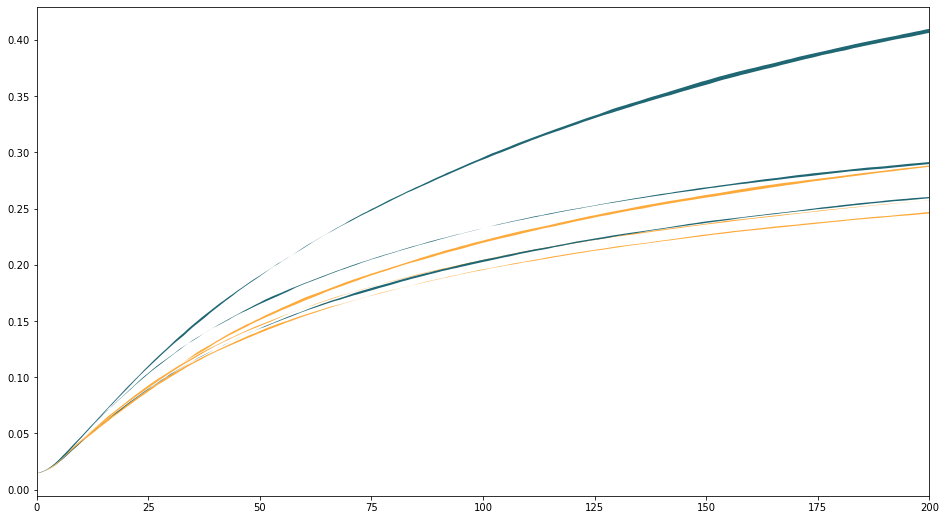

In [41]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
#plt.plot(df_all.index, mean_val_un,c='black',label='Original Network',linewidth=4.0)
ax.fill_between([i[0] for i in I_10_w_MPlusW], [i[1] for i in I_10_w_M], [i[1] for i in I_10_w_MPlusW], facecolor='#FDAA3A', interpolate=True)
ax.fill_between([i[0] for i in I_30_w_MPlusW], [i[1] for i in I_30_w_M], [i[1] for i in I_30_w_MPlusW], facecolor='#206774', interpolate=True)
ax.fill_between([i[0] for i in I_10_e_MPlusW], [i[1] for i in I_10_e_M], [i[1] for i in I_10_e_MPlusW], facecolor='#FDAA3A', interpolate=True)
ax.fill_between([i[0] for i in I_30_e_MPlusW], [i[1] for i in I_30_e_M], [i[1] for i in I_30_e_MPlusW], facecolor='#206774', interpolate=True)
ax.fill_between([i[0] for i in I_10_MPlusW], [i[1] for i in I_10_M], [i[1] for i in I_10_MPlusW], facecolor='#FDAA3A', interpolate=True)
ax.fill_between([i[0] for i in I_30_MPlusW], [i[1] for i in I_30_M], [i[1] for i in I_30_MPlusW], facecolor='#206774', interpolate=True)
plt.xlim(0,200)

In [1]:
N=DG.order()
v_1=[i[1] for i in I_10_w_M]
v_2=[i[1] for i in I_10_w_MPlusW]
v_3=[i[1] for i in I_30_w_M]
v_4=[i[1] for i in I_30_w_MPlusW]
v_5=[i[1] for i in I_10_e_M]
v_6=[i[1] for i in I_10_e_MPlusW]
v_7=[i[1] for i in I_30_e_M]
v_8=[i[1] for i in I_30_e_MPlusW]
v_9=[i[1] for i in I_10_M]
v_10=[i[1] for i in I_10_MPlusW]
v_11=[i[1] for i in I_10_M]
v_12=[i[1] for i in I_30_MPlusW]
value_10_w=[]
value_30_w=[]
value_10_e=[]
value_30_e=[]
value_10=[]
value_30=[]
for i in range(len(v_1)):
    value_10_w.append((v_2[i]-v_1[i])*N)
    value_30_w.append((v_4[i]-v_3[i])*N)
    value_10_e.append((v_6[i]-v_5[i])*N)
    value_30_e.append((v_8[i]-v_7[i])*N)
    value_10.append((v_10[i]-v_9[i])*N)
    value_30.append((v_12[i]-v_11[i])*N)
fig, axs = plt.subplots(6,1,figsize=(16,16))
fig.suptitle('The difference in number of infected nodes',fontsize=25)
axs[0].bar([i[0] for i in I_10_w_MPlusW], height=value_10_w, color='#FDAA3A', align='center',edgecolor="white")
#plt.ylabel('The difference in number of infected nodes',fontsize=25)
axs[1].bar([i[0] for i in I_10_w_MPlusW], height=value_30_w, color='#206774', align='center',edgecolor='white')
axs[2].bar([i[0] for i in I_10_w_MPlusW], height=value_10_e, color='#FDAA3A',align='center',edgecolor='white')

axs[3].bar([i[0] for i in I_10_w_MPlusW], height=value_30_e, color='#206774',align='center',edgecolor='white')
axs[4].bar([i[0] for i in I_10_w_MPlusW], height=value_10, color='#FDAA3A',align='center',edgecolor='white')
axs[5].bar([i[0] for i in I_10_w_MPlusW], height=value_30, color='#206774',align='center',edgecolor='white')
ax0_2=axs[0].twinx()
ax1_2=axs[1].twinx()
ax2_2=axs[2].twinx()
ax3_2=axs[3].twinx()
ax4_2=axs[4].twinx()
ax5_2=axs[5].twinx()
#plot second axis curve
#0
ax0_2.plot([i[0] for i in I_10_w_MPlusW], [i[1]*N for i in I_10_w_MPlusW],linestyle='-', c='#FDAA3A')
ax0_2.plot([i[0] for i in I_10_w_M], [i[1]*N for i in I_10_w_M],linestyle='--', c='#FDAA3A')
#1
ax1_2.plot([i[0] for i in I_30_w_MPlusW], [i[1]*N for i in I_30_w_MPlusW],linestyle='-',c='#206774')
ax1_2.plot([i[0] for i in I_30_w_M], [i[1]*N for i in I_30_w_M],linestyle='--',c='#206774')
#2
ax2_2.plot([i[0] for i in I_10_e_MPlusW], [i[1]*N for i in I_10_e_MPlusW],linestyle='-', c='#FDAA3A')
ax2_2.plot([i[0] for i in I_10_e_M], [i[1]*N for i in I_10_e_M],linestyle='--', c='#FDAA3A')
#3
ax3_2.plot([i[0] for i in I_30_e_MPlusW], [i[1]*N for i in I_30_e_MPlusW],linestyle='-', c='#206774')
ax3_2.plot([i[0] for i in I_30_e_M], [i[1]*N for i in I_30_e_M],linestyle='--', c='#206774')
#4
ax4_2.plot([i[0] for i in I_10_MPlusW],[i[1]*N for i in I_10_MPlusW],linestyle='-', c='#FDAA3A')
ax4_2.plot([i[0] for i in I_10_M],[i[1]*N for i in I_10_M],linestyle='--', c='#FDAA3A')
#5
ax5_2.plot([i[0] for i in I_30_MPlusW],[i[1]*N for i in I_30_MPlusW],linestyle='-', c='#206774')
ax5_2.plot([i[0] for i in I_30_M],[i[1]*N for i in I_30_M],linestyle='--', c='#206774')
plt.xlabel('Time(Steps)',fontsize=25)

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in axs.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
for ax in axs:
    ax.label_outer()

plt.legend(fontsize=19)
plt.savefig('real_6_month_SI_difference_misslink_misslinkPlusjustW_10_30_0.001_w_e.pdf')


NameError: name 'DG' is not defined

(0.0, 200.0)

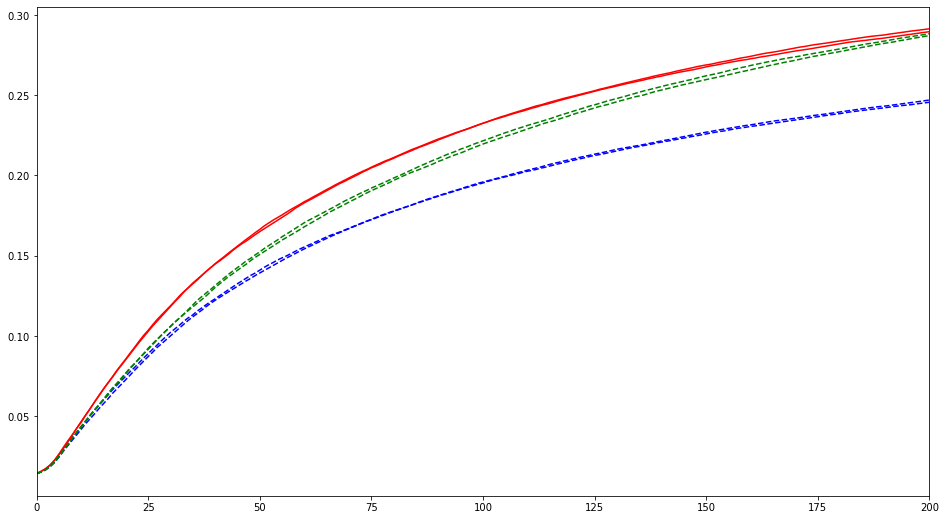

In [42]:
dy_10_w=[]
y_10_w=[]
for i in range(0,201):
    dy_10_w.append(float((I_10_e_M[i][1]-I_10_e_MPlusW[i][1])/2))
    y_10_w.append(float((I_10_e_M[i][1]+I_10_e_MPlusW[i][1])/2))
    
dy_10=[]
y_10=[]
for i in range(0,201):
    dy_10.append(float((I_10_M[i][1]-I_10_MPlusW[i][1])/2))
    y_10.append(float((I_10_M[i][1]+I_10_MPlusW[i][1])/2))
fig, ax= plt.subplots(1,1,figsize=(16,9))
#plt.plot(df_all.index, mean_val_un,c='black',label='Original Network')
plt.plot([i[0] for i in I_10_e_MPlusW], [i[1] for i in I_10_e_MPlusW],linestyle='--', c='b')
plt.plot([i[0] for i in I_10_e_M], [i[1] for i in I_10_e_M],linestyle='--', c='b')
#plt.errorbar([i[0] for i in I_10_e_MPlusW], y, yerr=dy, fmt='.b')
#plt.plot([i[0] for i in I_10_w_MPlusW], [i[1] for i in I_10_w_M], c='g')
plt.plot([i[0] for i in I_30_w_MPlusW], [i[1] for i in I_30_w_MPlusW],c='r')
plt.plot([i[0] for i in I_30_w_MPlusW], [i[1] for i in I_30_w_M],c='r')
plt.plot([i[0] for i in I_10_MPlusW],[i[1] for i in I_10_MPlusW],linestyle='--', c='g')
plt.plot([i[0] for i in I_10_MPlusW],[i[1] for i in I_10_M],linestyle='--', c='g')
#plt.errorbar([i[0] for i in I_10_MPlusW], y_10, yerr=dy_10, fmt='.g')
#plt.plot([i[0] for i in I_10_e_MPlusW], [i[1] for i in I_10_e_M], [i[1] for i in I_10_e_MPlusW],c='r')
#plt.plot([i[0] for i in I_30_e_MPlusW], [i[1] for i in I_30_e_M], [i[1] for i in I_30_e_MPlusW],c='g')
#plt.plot([i[0] for i in I_10_MPlusW], [i[1] for i in I_10_M], [i[1] for i in I_10_MPlusW],c='#FDAA3A')
#plt.plot([i[0] for i in I_30_MPlusW], [i[1] for i in I_30_M], [i[1] for i in I_30_MPlusW],c='#206774')
plt.xlim(0,200)

In [2]:
df.to_pickle('real_network/original_network_6_month_300step.pkl')
df_un10_w5.to_pickle('real_network/unw_10_w.pkl')
df_un50_w5.to_pickle('real_network/unw_50_w.pkl')
df_un10_e5.to_pickle('real_network/unw_10_e.pkl')
df_un50_e5.to_pickle('real_network/unw_50_e.pkl')
df_un10_entire5.to_pickle('real_network/unw_entire_10.pkl')
df_un50_entire5.to_pickle('real_network/unw_entire_50_w.pkl')

NameError: name 'df_un10_w5' is not defined

In [186]:
import pickle
with open ('real_network/original_network_6_month_300step.pkl', 'rb') as fp:
    df_all=pickle.load(fp)
with open ('real_network/unw_10_w.pkl', 'rb') as fp:
    df_un10_w5=pickle.load(fp)
with open ('real_network/unw_50_w.pkl', 'rb') as fp:
    df_un50_w5=pickle.load(fp)
with open ('real_network/unw_10_e.pkl', 'rb') as fp:
    df_un10_e5=pickle.load(fp)
with open ('real_network/unw_50_e.pkl', 'rb') as fp:
    df_un50_e5=pickle.load(fp)
with open ('real_network/unw_entire_10.pkl', 'rb') as fp:
    df_un10_entire5=pickle.load(fp)
with open ('real_network/unw_entire_50_w.pkl', 'rb') as fp:
    df_un50_entire5=pickle.load(fp)

In [187]:
df_all_un= df_all.set_index('time')
mean_val_un = df_all_un.iloc[:,0:].mean(axis=1)
std_val_un= df_all_un.iloc[:,0:].std(axis=1)
min_val_un = mean_val_un - 2*std_val_un
max_val_un = mean_val_un + 2*std_val_un    
df_all_un.reset_index(inplace = True)

df_all_un= df_un10_e5.set_index('time')
df_un10_e_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
std_val_un= df_all_un.iloc[:,0:].std(axis=1)
min_val_un1 = df_un10_e_mean5 - 2*std_val_un
max_val_un1 = df_un10_e_mean5 + 2*std_val_un 
df_all_un.reset_index(inplace = True)

df_all_un= df_un50_e5.set_index('time')
df_un50_e_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
std_val_un= df_all_un.iloc[:,0:].std(axis=1)
min_val_un2 = df_un50_e_mean5 - 2*std_val_un
max_val_un2 = df_un50_e_mean5 + 2*std_val_un 
df_all_un.reset_index(inplace = True)

df_all_un= df_un10_w5.set_index('time')
df_un10_w_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
std_val_un= df_all_un.iloc[:,0:].std(axis=1)
min_val_un3 = df_un10_w_mean5 - 2*std_val_un
max_val_un3 = df_un10_w_mean5 + 2*std_val_un 
df_all_un.reset_index(inplace = True)

df_all_un= df_un50_w5.set_index('time')
df_un50_w_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
std_val_un= df_all_un.iloc[:,0:].std(axis=1)
min_val_un4 = df_un50_w_mean5 - 2*std_val_un
max_val_un4 = df_un50_w_mean5 + 2*std_val_un 
df_all_un.reset_index(inplace = True)

df_all_un= df_un10_entire5.set_index('time')
df_un10_entire_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
std_val_un= df_all_un.iloc[:,0:].std(axis=1)
min_val_un5 = df_un10_entire_mean5 - 2*std_val_un
max_val_un5 = df_un10_entire_mean5 + 2*std_val_un 
df_all_un.reset_index(inplace = True)

df_all_un= df_un50_entire5.set_index('time')
df_un50_entire_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
std_val_un= df_all_un.iloc[:,0:].std(axis=1)
min_val_un6 = df_un50_entire_mean5 - 2*std_val_un
max_val_un6 = df_un50_entire_mean5 + 2*std_val_un 
df_all_un.reset_index(inplace = True)

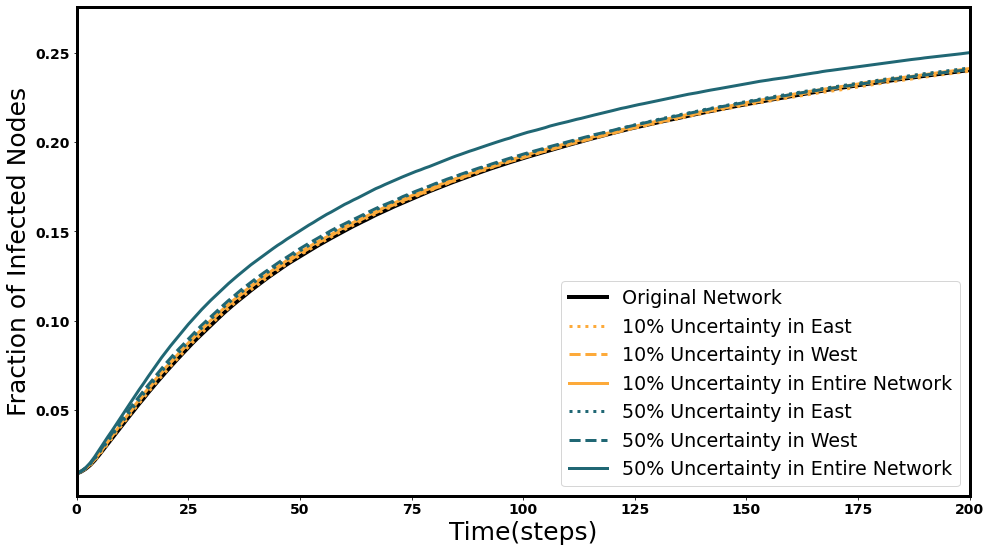

In [45]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

#for i in range(1,11):
 #   ax=df.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='black', marker='*',alpha=0.2)

plt.plot(df_all.index, mean_val_un,c='black',label='Original Network',linewidth=4.0)
#plt.fill_between(df.index, df_min, df_max, color='blue', alpha=.2)


#for i in range(1,11):
 #   ax=df_un10_e.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='r', marker='o',alpha=0.2)
plt.plot(df_un10_e5['time'], df_un10_e_mean5,c='#FDAA3A',label='10% Uncertainty in East',linestyle='dotted',linewidth=3.0)

#for i in range(1,11):
#    ax=df_un10_w.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#FFC125', marker='o',alpha=0.2)
plt.plot(df_un10_w5['time'], df_un10_w_mean5,c='#FDAA3A',linestyle='--',label='10% Uncertainty in West',linewidth=3.0)
#plt.fill_between(df_un10_com1.index, df_un10_com1_min, df_un10_com1_max, color='goldenrod', alpha=.2)

#for i in range(1,11):
 #   ax=df_un10_entire.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='chocolate', marker='^',alpha=0.2)
plt.plot(df_un10_entire5['time'], df_un10_entire_mean5,label='10% Uncertainty in Entire Network',c='#FDAA3A',linewidth=3.0)
#plt.fill_between(df_un10_entire.index, df_un10_entire_min, df_un10_entire_max, color='chocolate', alpha=.2)


#for i in range(1,11):
 #   ax=df_un50_e.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#B23AEE', marker='o',alpha=0.2)
plt.plot(df_un50_e5['time'], df_un50_e_mean5,c='#206774',label='50% Uncertainty in East',linestyle='dotted',linewidth=3.0)
#for i in range(1,11):
 #   ax=df_un50_w.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#008B00',marker='*',alpha=0.2)
plt.plot(df_un50_w5['time'], df_un50_w_mean5,c='#206774',linestyle='--', label='50% Uncertainty in West',linewidth=3.0)
#plt.fill_between(df_un50_com1.index, df_un50_com1_min, df_un50_com1_max, color='lightskyblue', alpha=.2)

#for i in range(1,11):
 #   ax=df_un50_entire.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='darkturquoise', marker='o',alpha=0.2, edgecolors='none')
plt.plot(df_un50_entire5['time'], df_un50_entire_mean5,label='50% Uncertainty in Entire Network',c='#206774',linewidth=3.0)
#plt.fill_between(df_un50_entire.index, df_un50_entire_min, df_un50_entire_max, color='mediumseagreen', alpha=.2)






plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_6_month_SI_un_weight_10&50_0.001_w_e.pdf')

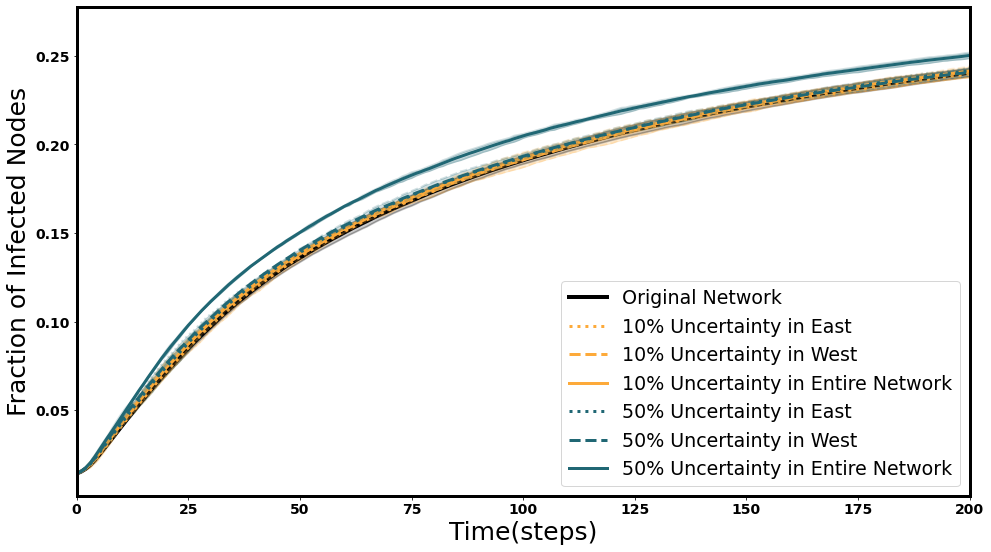

In [196]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

#for i in range(1,11):
 #   ax=df.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='black', marker='*',alpha=0.2)

plt.plot(df_all.index, mean_val_un,c='black',label='Original Network',linewidth=4.0)
plt.fill_between(df_all.index, min_val_un, max_val_un, color='black', alpha=.2)
plt.plot(df_all.index, min_val_un,c='black',linewidth=2.0,alpha=.2)
plt.plot(df_all.index, max_val_un,c='black',linewidth=2.0,alpha=.2)
#plt.fill_between(df.index, df_min, df_max, color='blue', alpha=.2)


plt.plot(df_un10_e5['time'], df_un10_e_mean5,c='#FDAA3A',label='10% Uncertainty in East',linestyle='dotted',linewidth=3.0)
plt.fill_between(df['time'], min_val_un1, max_val_un1, color='#FDAA3A', alpha=.2)
plt.plot(df['time'], min_val_un1,c='#FDAA3A',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], max_val_un1,c='#FDAA3A',linewidth=2.0,linestyle='dotted',alpha=.2)


plt.plot(df_un10_w5['time'], df_un10_w_mean5,c='#FDAA3A',linestyle='--',label='10% Uncertainty in West',linewidth=3.0)
plt.fill_between(df['time'], min_val_un3, max_val_un3, color='#FDAA3A', alpha=.2)
plt.plot(df['time'], min_val_un3,c='#FDAA3A',linewidth=2.0,linestyle='--',alpha=.2)
plt.plot(df['time'], max_val_un3,c='#FDAA3A',linewidth=2.0,linestyle='--',alpha=.2)


#for i in range(1,11):
 #   ax=df_un10_entire.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='chocolate', marker='^',alpha=0.2)
plt.plot(df_un10_entire5['time'], df_un10_entire_mean5,label='10% Uncertainty in Entire Network',c='#FDAA3A',linewidth=3.0)
plt.fill_between(df['time'], min_val_un5, max_val_un5, color='#FDAA3A', alpha=.2)
plt.plot(df['time'], min_val_un5,c='#FDAA3A',linewidth=2.0,alpha=.2)
plt.plot(df['time'], max_val_un5,c='#FDAA3A',linewidth=2.0,alpha=.2)


#for i in range(1,11):
 #   ax=df_un50_e.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#B23AEE', marker='o',alpha=0.2)
plt.plot(df_un50_e5['time'], df_un50_e_mean5,c='#206774',label='50% Uncertainty in East',linestyle='dotted',linewidth=3.0)
plt.fill_between(df['time'], min_val_un2, max_val_un2, color='#206774', alpha=.2)
plt.plot(df['time'], min_val_un2,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], max_val_un2,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_un50_w5['time'], df_un50_w_mean5,c='#206774',linestyle='--', label='50% Uncertainty in West',linewidth=3.0)
plt.fill_between(df['time'], min_val_un4, max_val_un4, color='#206774', alpha=.2)
plt.plot(df['time'], min_val_un4,c='#206774',linewidth=2.0,linestyle='--',alpha=.2)
plt.plot(df['time'], max_val_un4,c='#206774',linewidth=2.0,linestyle='--',alpha=.2)
#plt.fill_between(df_un50_com1.index, df_un50_com1_min, df_un50_com1_max, color='lightskyblue', alpha=.2)

#for i in range(1,11):
 #   ax=df_un50_entire.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='darkturquoise', marker='o',alpha=0.2, edgecolors='none')
plt.plot(df_un50_entire5['time'], df_un50_entire_mean5,label='50% Uncertainty in Entire Network',c='#206774',linewidth=3.0)
plt.fill_between(df['time'], min_val_un6, max_val_un6, color='#206774', alpha=.2)
plt.plot(df['time'], min_val_un6,c='#206774',linewidth=2.0,alpha=.2)
plt.plot(df['time'], max_val_un6,c='#206774',linewidth=2.0,alpha=.2)
#plt.fill_between(df_un50_entire.index, df_un50_entire_min, df_un50_entire_max, color='mediumseagreen', alpha=.2)






plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_6_month_SI_un_weight_10&50_0.001_w_e_modif.pdf')

#Missing link on real datset

In [19]:
df, df_mean, df_min, df_max=multiran_result_SI(DG,IN_IN_risk_region)
df_un10_w, df_un10_w_mean, df_un10_w_min,df_un10_w_max=multiran_result_SI(miss_DG_w_10,IN_IN_risk_region)
df_un50_w, df_un50_w_mean, df_un50_w_min,df_un50_w_max=multiran_result_SI(miss_DG_w_50,IN_IN_risk_region)
#df_un100_com1, df_un100_com1_mean, df_un100_com1_min,df_un100_com1_max=multiran_result_SI(M_Bar1_100,IN_IN_Bar_com1)
df_un10_entire, df_un10_entire_mean, df_un10_entire_min,df_un10_entire_max=multiran_result_SI(miss_DG_10,IN_IN_risk_region)
df_un50_entire, df_un50_entire_mean, df_un50_entire_min,df_un50_entire_max=multiran_result_SI(miss_DG_50,IN_IN_risk_region)
df_un10_e, df_un10_e_mean, df_un10_e_min,df_un10_e_max=multiran_result_SI(miss_DG_e_10,IN_IN_risk_region)
df_un50_e, df_un50_e_mean, df_un50_e_min,df_un50_e_max=multiran_result_SI(miss_DG_e_50,IN_IN_risk_region)

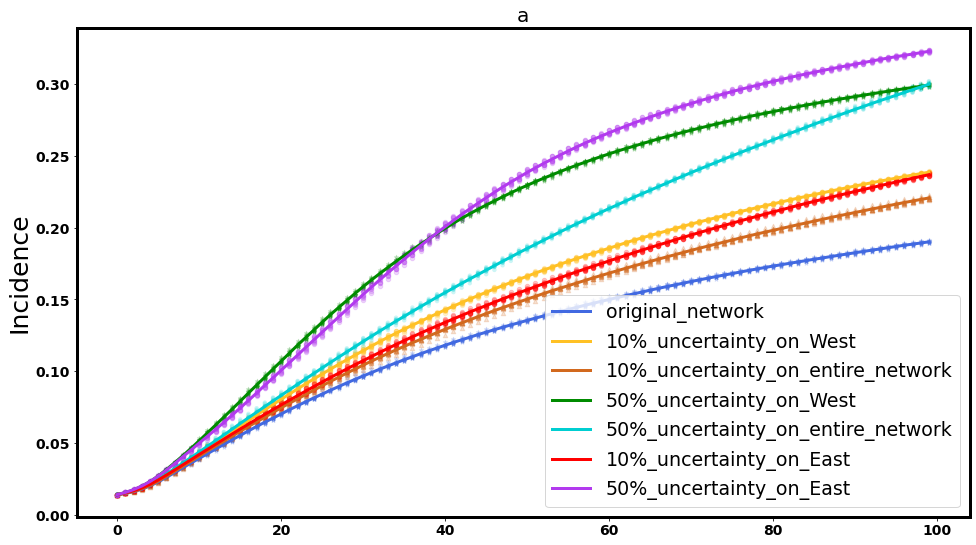

In [20]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

for i in range(1,11):
    ax=df.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='black', marker='*',alpha=0.2)

plt.plot(df['time'], df_mean,c='black',label='original_network',linewidth=3.0)
#plt.fill_between(df.index, df_min, df_max, color='blue', alpha=.2)

for i in range(1,11):
    ax=df_un10_w.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#FFC125', marker='o',alpha=0.2)
plt.plot(df_un10_w['time'], df_un10_w_mean,c='#FDAA3A',linestyle='--',label='10%_uncertainty_on_West',linewidth=3.0)
#plt.fill_between(df_un10_com1.index, df_un10_com1_min, df_un10_com1_max, color='goldenrod', alpha=.2)

for i in range(1,11):
    ax=df_un10_entire.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='chocolate', marker='^',alpha=0.2)
plt.plot(df_un10_entire['time'], df_un10_entire_mean,label='10%_uncertainty_on_entire_network',c='#FDAA3A',linewidth=3.0)
#plt.fill_between(df_un10_entire.index, df_un10_entire_min, df_un10_entire_max, color='chocolate', alpha=.2)

for i in range(1,11):
    ax=df_un50_w.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#008B00',marker='*',alpha=0.2)
plt.plot(df_un50_w['time'], df_un50_w_mean,c='#008B00', label='50%_uncertainty_on_West',linewidth=3.0)
#plt.fill_between(df_un50_com1.index, df_un50_com1_min, df_un50_com1_max, color='lightskyblue', alpha=.2)

for i in range(1,11):
    ax=df_un50_entire.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='darkturquoise', marker='o',alpha=0.2, edgecolors='none')
plt.plot(df_un50_entire['time'], df_un50_entire_mean,label='50%_uncertainty_on_entire_network',c='darkturquoise',linewidth=3.0)
#plt.fill_between(df_un50_entire.index, df_un50_entire_min, df_un50_entire_max, color='mediumseagreen', alpha=.2)

for i in range(1,11):
    ax=df_un10_e.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='r', marker='o',alpha=0.2)
plt.plot(df_un10_e['time'], df_un10_e_mean,c='r',label='10%_uncertainty_on_East',linewidth=3.0)

for i in range(1,11):
    ax=df_un50_e.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#B23AEE', marker='o',alpha=0.2)
plt.plot(df_un50_e['time'], df_un50_e_mean,c='#B23AEE',label='50%_uncertainty_on_East',linewidth=3.0)


plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('')
plt.ylabel('Incidence',fontsize=25)
plt.title('a',fontsize=20)
plt.legend(fontsize=19)
#plt.savefig('real_6_month_SI_0.001_missing_w_e.pdf')

In [29]:
miss1_DG_w_10=add_missing_link_special(10,list_west_nodes,DG)
miss1_DG_e_10=add_missing_link_special(10,list_east_nodes,DG)
miss1_DG_w_50=add_missing_link_special(30,list_west_nodes,DG)
miss1_DG_e_50=add_missing_link_special(30,list_east_nodes,DG)
miss1_DG_10=add_missing_link_entire(DG,10)
miss1_DG_50=add_missing_link_entire(DG,30)

In [ ]:
I1,df_1=My_Epi_SI(DG,IN_IN_risk_region)
I2,df_un10_w1=My_Epi_SI(miss1_DG_w_10,IN_IN_risk_region)
I3,df_un30_w1=My_Epi_SI(miss1_DG_w_50,IN_IN_risk_region)
I4,df_un10_entire1=My_Epi_SI(miss1_DG_10,IN_IN_risk_region)
I5,df_un30_entire1=My_Epi_SI(miss1_DG_50,IN_IN_risk_region)
I6,df_un10_e1=My_Epi_SI(miss1_DG_e_10,IN_IN_risk_region)
I7,df_un30_e1=My_Epi_SI(miss1_DG_e_50,IN_IN_risk_region)

NameError: name 'df_1' is not defined

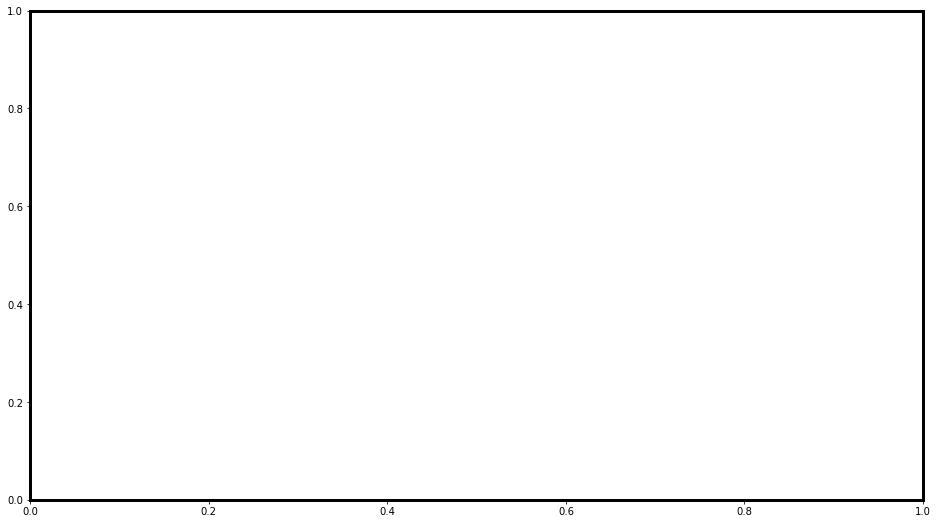

In [110]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot([i[0] for i in df_1],[i[1] for i in df_1] ,c='black',label='Original Network',linewidth=4.0)

plt.plot([i[0] for i in df_un10_w1],[i[1] for i in df_un10_w1],c='#FDAA3A',linestyle='--',label='10% Uncertainty on West',linewidth=3.0)

plt.plot([i[0] for i in df_un10_entire1], [i[1] for i in df_un10_entire1],label='10% Uncertainty on Entire Network',c='#FDAA3A',linewidth=3.0)

plt.plot([i[0] for i in df_un10_e1], [i[1] for i in df_un10_e1],c='#FDAA3A',label='10% Uncertainty on East',linestyle='dotted',linewidth=3.0)


plt.plot([i[0] for i in df_un30_w1] , [i[1] for i in df_un30_w1],c='#206774',linestyle='--', label='30% Uncertainty on West',linewidth=3.0)

plt.plot([i[0] for i in df_un30_entire1],[i[1] for i in df_un30_entire1],label='30% Uncertainty on Entire Network',c='#206774',linewidth=3.0)


plt.plot([i[0] for i in df_un30_e1], [i[1] for i in df_un30_e1],c='#206774',label='30% Uncertainty on East',linestyle='dotted',linewidth=3.0)




fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Number of Infected Cases',fontsize=25)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_6_month_SI_0.001_missing_w_e_100ININ_10_30.pdf')

In [27]:
#new assumption
#better assumption
#add kust missing link not increasing the weight to the network
#set weight of the missing edge was added related to the weight of the other edges of each node
#list of weights in th original network
list_weights=[]
for (u,v) in DG.edges():
        list_weights.append(DG.adj[u][v]['weight'])
        
        
        
#add missing link
def add_just_missing_link_entire(Graph,a):
    list_weights=[]
    for (u,v) in Graph.edges():
        list_weights.append(Graph.adj[u][v]['weight'])
    G_o=copy.deepcopy(Graph)
    G1=copy.deepcopy(Graph)
    N_missing_link=int((a*0.01)*G1.number_of_edges())
    i=0
    while i<N_missing_link:
        node_tuple=random.sample(list(G1.nodes()), 2)

        if (node_tuple[0],node_tuple[1]) not in G1.edges():
            #first find the mean of weights of edges this node have
           #be careful if you first add new edge you will get erros in calculating mean of weight of edges
            list_neigh=list(G_o.edges(node_tuple[0],data=True))#make a list of weights of the edges incident to this node in the original network without missing link
            list_w=[item[2]['weight'] for item in list_neigh]
            G1.add_edge(node_tuple[0],node_tuple[1])
            #If node in original network do not have any edges and it is isolated
            if len(list_neigh)==0:
                G1[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_weights, 1))[0]
            #if node has neighbors we choose weight for missing link based on weights of other edges of node
            else:
                G1.adj[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_w, 1))[0]
                
        
            # this one should be select based on the distribution for the weight of the network was used
            i+=1
        
    return G1

def add_just_missing_link_comunity(a,list_n,Graph):
    list_weights=[]
    for (u,v) in Graph.edges():
        list_weights.append(Graph.adj[u][v]['weight'])
    G_o=copy.deepcopy(Graph)
    G1=copy.deepcopy(Graph)
    n_edge_region=0
    for n in list_n:
        for n1 in list_n:
            n_edge_region=G_o.number_of_edges(n,n1)+ n_edge_region
    N_missing_link=int((a*0.01)*n_edge_region)
    i=0
    while i<N_missing_link:
        node_tuple=random.sample(list_n, 2)#I used random.sample instead of random.choice
                                            #because randome.sample do not allow repitition so it avoid self loop here
                                             
        if (node_tuple[0],node_tuple[1]) not in G1.edges():
           #first find the mean of weights of edges this node have
           #be careful if you first add new edge you will get erros in calculating mean of weight of edges
            list_neigh=list(G_o.edges(node_tuple[0],data=True))#make a list of weights of the edges incident to this node in the original network without missing link
            list_w=[item[2]['weight'] for item in list_neigh]
            G1.add_edge(node_tuple[0],node_tuple[1])
            #If node in original network do not have any edges and it is isolated the weight of missing link should choosed from weight distribution
            if len(list_neigh)==0:
                G1[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_weights, 1))[0]
            #if node has neighbors we choose weight for missing link based on weights of other edges of node
            else:
                G1.adj[node_tuple[0]][node_tuple[1]]['weight']=list(random.sample(list_w, 1))[0]
     
                
            # this one should be select based on the distribution for the weight of the network was used
            i+=1
        
    return G1


In [31]:
miss1_DG_w_10=add_just_missing_link_comunity(10,list_west_nodes,DG)
miss1_DG_e_10=add_just_missing_link_comunity(10,list_east_nodes,DG)
miss1_DG_w_50=add_just_missing_link_comunity(30,list_west_nodes,DG)
miss1_DG_e_50=add_just_missing_link_comunity(30,list_east_nodes,DG)
miss1_DG_10=add_just_missing_link_entire(DG,10)
miss1_DG_50=add_just_missing_link_entire(DG,30)


In [104]:
nx.write_gpickle(DG, "real_network/G_O_6_month.gpickle")
nx.write_gpickle(miss1_DG_w_10, "real_network/G_miss_w_10.gpickle")
nx.write_gpickle(miss1_DG_e_10, "real_network/G_miss_e_10.gpickle")
nx.write_gpickle(miss1_DG_10, "real_network/G_miss_entire_10.gpickle")
nx.write_gpickle(miss1_DG_w_50, "real_network/G_miss_w_30.gpickle")
nx.write_gpickle(miss1_DG_e_50, "real_network/G_miss_e_30.gpickle")
nx.write_gpickle(miss1_DG_50, "real_network/G_miss_entire_30.gpickle")

In [15]:
#df, df_mean, df_min, df_max=multiran_result_SI(DG,IN_IN_risk_region)
df_un10_w, df_un10_w_mean, df_un10_w_min,df_un10_w_max=multiran_result_SI(miss1_DG_w_10,IN_IN_risk_region)
df_un50_w, df_un50_w_mean, df_un50_w_min,df_un50_w_max=multiran_result_SI(miss1_DG_w_50,IN_IN_risk_region)
df_un10_entire, df_un10_entire_mean, df_un10_entire_min,df_un10_entire_max=multiran_result_SI(miss1_DG_10,IN_IN_risk_region)
df_un50_entire, df_un50_entire_mean, df_un50_entire_min,df_un50_entire_max=multiran_result_SI(miss1_DG_50,IN_IN_risk_region)
df_un10_e, df_un10_e_mean, df_un10_e_min,df_un10_e_max=multiran_result_SI(miss1_DG_e_10,IN_IN_risk_region)
df_un50_e, df_un50_e_mean, df_un50_e_min,df_un50_e_max=multiran_result_SI(miss1_DG_e_50,IN_IN_risk_region)

KeyboardInterrupt: 

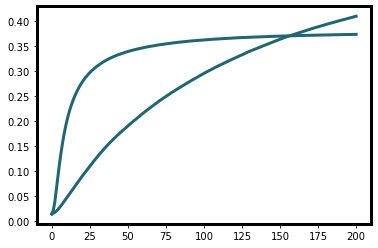

In [184]:
plt.plot([i[0] for i in df_un30_entire],[i[1] for i in df_un30_entire],label='30% Missing Links in Entire Network',c='#206774',linewidth=3.0)
plt.plot([i[0] for i in df_un30_entire],df_un50_w_mean,label='30% Missing Links in Entire Network',c='#206774',linewidth=3.0)

In [34]:
df_all= df.set_index('time')
mean_val_un = df_all.iloc[:,0:].mean(axis=1)
df_all.reset_index(inplace = True)

In [38]:
I0,df_un10_w=My_Epi_SI(miss1_DG_w_10,IN_IN_risk_region)
I1,df_un30_w=My_Epi_SI(miss1_DG_w_50,IN_IN_risk_region)
I2,df_un10_entire=My_Epi_SI(miss1_DG_10,IN_IN_risk_region)
I3,df_un30_entire=My_Epi_SI(miss1_DG_50,IN_IN_risk_region)
I4,df_un10_e=My_Epi_SI(miss1_DG_e_10,IN_IN_risk_region)
I5,df_un30_e=My_Epi_SI(miss1_DG_e_50,IN_IN_risk_region)

In [39]:
import pickle
with open ('real_network/epi_network_just_10%_missing_link_6_month_west', 'wb') as fp:
    pickle.dump(df_un10_w, fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_west', 'wb') as fp:
    pickle.dump(df_un30_w, fp)
with open ('real_network/epi_network_just_10%_missing_link_6_month_east', 'wb') as fp:
    pickle.dump(df_un10_e, fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_east', 'wb') as fp:
    pickle.dump(df_un30_e, fp)
with open ('real_network/epi_network_just_10%_missing_link_6_month_entire', 'wb') as fp:
    pickle.dump(df_un10_entire, fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_entire', 'wb') as fp:
    pickle.dump(df_un30_entire, fp)

In [201]:
import pickle
with open ('real_network/epi_network_just_10%_missing_link_6_month_west', 'rb') as fp:
    df_un10_w=pickle.load(fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_west', 'rb') as fp:
    df_un30_w=pickle.load(fp)
with open ('real_network/epi_network_just_10%_missing_link_6_month_east', 'rb') as fp:
    df_un10_e=pickle.load(fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_east', 'rb') as fp:
    df_un30_e=pickle.load(fp)
with open ('real_network/epi_network_just_10%_missing_link_6_month_entire', 'rb') as fp:
    df_un10_entire=pickle.load(fp)
with open ('real_network/epi_network_just_30%_missing_link_6_month_entire', 'rb') as fp:
    df_un30_entire=pickle.load(fp)

In [ ]:
df_all_un= df_all.set_index('time')
mean_val_un = df_all_un.iloc[:,0:].mean(axis=1)
df_all_un.reset_index(inplace = True)

df_all_un= df_un10_e5.set_index('time')
df_un10_e_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
df_all_un.reset_index(inplace = True)

df_all_un= df_un50_e5.set_index('time')
df_un50_e_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
df_all_un.reset_index(inplace = True)

df_all_un= df_un10_w5.set_index('time')
df_un10_w_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
df_all_un.reset_index(inplace = True)

df_all_un= df_un50_w5.set_index('time')
df_un50_w_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
df_all_un.reset_index(inplace = True)

df_all_un= df_un10_entire5.set_index('time')
df_un10_entire_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
df_all_un.reset_index(inplace = True)

df_all_un= df_un50_entire5.set_index('time')
df_un50_entire_mean5 = df_all_un.iloc[:,0:].mean(axis=1)
df_all_un.reset_index(inplace = True)

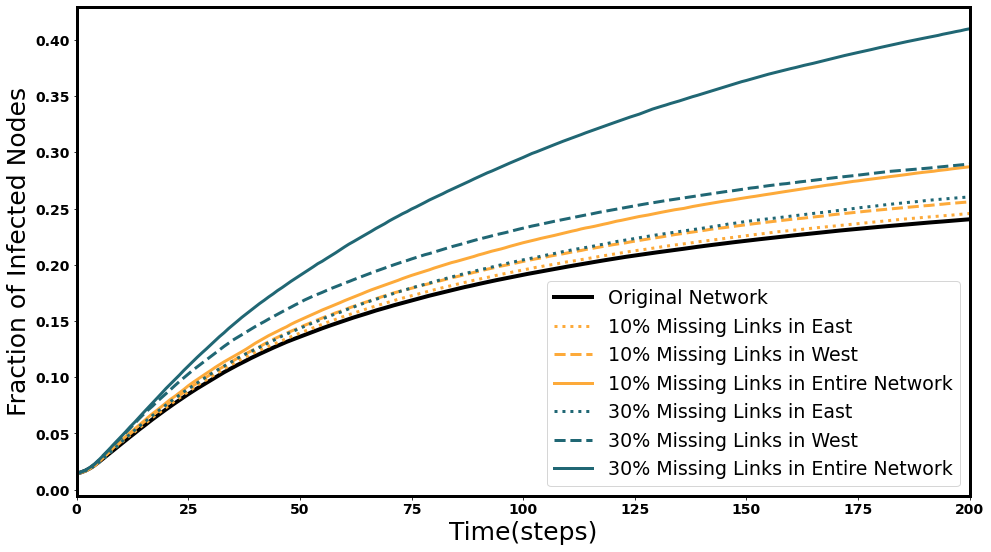

In [40]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot(df_all.index, mean_val_un,c='black',label='Original Network',linewidth=4.0)

plt.plot([i[0] for i in df_un10_e], [i[1] for i in df_un10_e],c='#FDAA3A',label='10% Missing Links in East',linestyle='dotted',linewidth=3.0)


plt.plot([i[0] for i in df_un10_w],[i[1] for i in df_un10_w],c='#FDAA3A',linestyle='--',label='10% Missing Links in West',linewidth=3.0)

plt.plot([i[0] for i in df_un10_entire], [i[1] for i in df_un10_entire],label='10% Missing Links in Entire Network',c='#FDAA3A',linewidth=3.0)

plt.plot([i[0] for i in df_un30_e], [i[1] for i in df_un30_e],c='#206774',label='30% Missing Links in East',linestyle='dotted',linewidth=3.0)

plt.plot([i[0] for i in df_un30_w] , [i[1] for i in df_un30_w],c='#206774',linestyle='--', label='30% Missing Links in West',linewidth=3.0)

plt.plot([i[0] for i in df_un30_entire],[i[1] for i in df_un30_entire],label='30% Missing Links in Entire Network',c='#206774',linewidth=3.0)






fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_6_month_SI_0.001_just_missing_w_e_1000ININ_10_30.pdf')

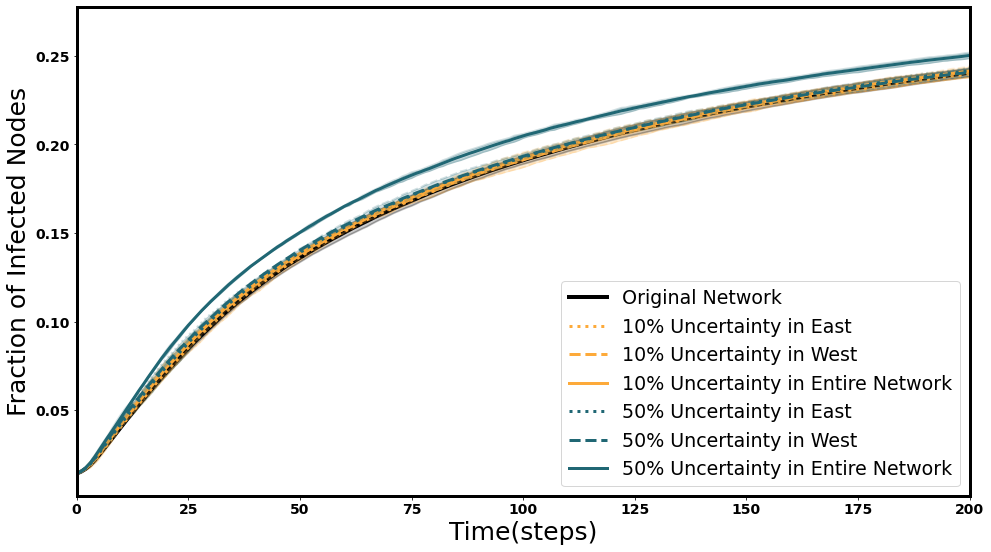

In [199]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

#for i in range(1,11):
 #   ax=df.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='black', marker='*',alpha=0.2)

plt.plot(df_all.index, mean_val_un,c='black',label='Original Network',linewidth=4.0)
plt.fill_between(df_all.index, min_val_un, max_val_un, color='black', alpha=.2)
plt.plot(df_all.index, min_val_un,c='black',linewidth=2.0,alpha=.2)
plt.plot(df_all.index, max_val_un,c='black',linewidth=2.0,alpha=.2)
#plt.fill_between(df.index, df_min, df_max, color='blue', alpha=.2)


plt.plot(df_un10_e5['time'], df_un10_e_mean5,c='#FDAA3A',label='10% Uncertainty in East',linestyle='dotted',linewidth=3.0)
plt.fill_between(df['time'], min_val_un1, max_val_un1, color='#FDAA3A', alpha=.2)
plt.plot(df['time'], min_val_un1,c='#FDAA3A',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], max_val_un1,c='#FDAA3A',linewidth=2.0,linestyle='dotted',alpha=.2)


plt.plot(df_un10_w5['time'], df_un10_w_mean5,c='#FDAA3A',linestyle='--',label='10% Uncertainty in West',linewidth=3.0)
plt.fill_between(df['time'], min_val_un3, max_val_un3, color='#FDAA3A', alpha=.2)
plt.plot(df['time'], min_val_un3,c='#FDAA3A',linewidth=2.0,linestyle='--',alpha=.2)
plt.plot(df['time'], max_val_un3,c='#FDAA3A',linewidth=2.0,linestyle='--',alpha=.2)


#for i in range(1,11):
 #   ax=df_un10_entire.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='chocolate', marker='^',alpha=0.2)
plt.plot(df_un10_entire5['time'], df_un10_entire_mean5,label='10% Uncertainty in Entire Network',c='#FDAA3A',linewidth=3.0)
plt.fill_between(df['time'], min_val_un5, max_val_un5, color='#FDAA3A', alpha=.2)
plt.plot(df['time'], min_val_un5,c='#FDAA3A',linewidth=2.0,alpha=.2)
plt.plot(df['time'], max_val_un5,c='#FDAA3A',linewidth=2.0,alpha=.2)


#for i in range(1,11):
 #   ax=df_un50_e.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='#B23AEE', marker='o',alpha=0.2)
plt.plot(df_un50_e5['time'], df_un50_e_mean5,c='#206774',label='50% Uncertainty in East',linestyle='dotted',linewidth=3.0)
plt.fill_between(df['time'], min_val_un2, max_val_un2, color='#206774', alpha=.2)
plt.plot(df['time'], min_val_un2,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], max_val_un2,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df_un50_w5['time'], df_un50_w_mean5,c='#206774',linestyle='--', label='50% Uncertainty in West',linewidth=3.0)
plt.fill_between(df['time'], min_val_un4, max_val_un4, color='#206774', alpha=.2)
plt.plot(df['time'], min_val_un4,c='#206774',linewidth=2.0,linestyle='--',alpha=.2)
plt.plot(df['time'], max_val_un4,c='#206774',linewidth=2.0,linestyle='--',alpha=.2)
#plt.fill_between(df_un50_com1.index, df_un50_com1_min, df_un50_com1_max, color='lightskyblue', alpha=.2)

#for i in range(1,11):
 #   ax=df_un50_entire.plot.scatter(ax=ax,x='time', y=f"vals_{i}",c='darkturquoise', marker='o',alpha=0.2, edgecolors='none')
plt.plot(df_un50_entire5['time'], df_un50_entire_mean5,label='50% Uncertainty in Entire Network',c='#206774',linewidth=3.0)
plt.fill_between(df['time'], min_val_un6, max_val_un6, color='#206774', alpha=.2)
plt.plot(df['time'], min_val_un6,c='#206774',linewidth=2.0,alpha=.2)
plt.plot(df['time'], max_val_un6,c='#206774',linewidth=2.0,alpha=.2)
#plt.fill_between(df_un50_entire.index, df_un50_entire_min, df_un50_entire_max, color='mediumseagreen', alpha=.2)






fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3)
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_6_month_SI_0.001_just_missing_w_e_1000ININ_10_30_modif.pdf')

In [9]:
#find the distribution of changing weight. how much weights are changed in the scenario of 
#adding up to 50 percent uncertainty
G_o=nx.read_gpickle("real_network/G_O_6_month.gpickle")
G_un_w_entire_10=nx.read_gpickle("real_network/G_unw_entire_10.gpickle")
G_un_w_entire_50=nx.read_gpickle("real_network/G_unw_entire_50.gpickle")
G_un_w_w_50=nx.read_gpickle("real_network/G_unw_w_50.gpickle")
G_un_w_w_10=nx.read_gpickle("real_network/G_unw_w_10.gpickle")
w_t_G_entire_10=[]  #the first element in each tuple is showing the weight of the edge in original network and 
                  #the second element 
w_t_G_entire_50=[]    
w_t_G_w_50=[] 
w_t_G_w_10=[] 
for (u,v) in G_o.edges():
    if G_o[u][v]['weight']!=G_un_w_entire_10[u][v]['weight']:
        w_t_G_entire_10.append((G_o[u][v]['weight'],G_un_w_entire_10[u][v]['weight']))
    if G_o[u][v]['weight']!=G_un_w_entire_50[u][v]['weight']:
        w_t_G_entire_50.append((G_o[u][v]['weight'],G_un_w_entire_50[u][v]['weight'])) 
    if G_o[u][v]['weight']!=G_un_w_w_50[u][v]['weight']:
        w_t_G_w_50.append((G_o[u][v]['weight'],G_un_w_w_50[u][v]['weight']))  
    if G_o[u][v]['weight']!=G_un_w_w_10[u][v]['weight']:
        w_t_G_w_10.append((G_o[u][v]['weight'],G_un_w_w_10[u][v]['weight'])) 



In [99]:
#find the distribution of percentages
#distribution function
def dist_type(list_t):
    T_1SU=np.unique(list_t)
    dist=list()
    for x in T_1SU:
        C=list_t.count(x)
        dist.append([x,C])
    return dist


p_G_entire_10=[]
p_G_entire_50=[]
p_G_w_10=[]
p_G_w_50=[]
for item in w_t_G_entire_10:
     p_G_entire_10.append(float(((item[1]-item[0])/item[0])*100))
for item in w_t_G_entire_50:
     p_G_entire_50.append(float(((item[1]-item[0])/item[0])*100))
for item in w_t_G_w_10:
     p_G_w_10.append(float(((item[1]-item[0])/item[0])*100))
for item in w_t_G_w_50:
     p_G_w_50.append(float(((item[1]-item[0])/item[0])*100))
    
d_G_entire_10=dist_type(p_G_entire_10)
d_G_entire_50=dist_type(p_G_entire_50)
d_G_w_10=dist_type(p_G_w_10)
d_G_w_50=dist_type(p_G_w_50)
   
    
   

In [82]:
a_10=0;a_20=0;a_30=0;a_40=0;a_50=0
for i,j in d_G_entire_50:
    if i<=10:
        a_10+=j
    elif 10<i<=20:
        a_20+=j
    elif 20<i<=30:
        a_30+=j
    elif 30<i<=40:
        a_40+=j
    elif 40<i<=50:
        a_50+=j
        
a_w_10=0;a_w_20=0;a_w_30=0;a_w_40=0;a_w_50=0
for i,j in d_G_w_50:
    if i<=10:
        a_w_10+=j
    elif 10<i<=20:
        a_w_20+=j
    elif 20<i<=30:
        a_w_30+=j
    elif 30<i<=40:
        a_w_40+=j
    elif 40<i<=50:
        a_w_50+=j

b_2=0;b_4=0;b_6=0;b_8=0;b_10=0
for i,j in d_G_entire_10:
    if i<=2:
        b_2+=j
    elif 2<i<=4:
        b_4+=j
    elif 4<i<=6:
        b_6+=j
    elif 6<i<=8:
        b_8+=j
    elif 8<i<=10:
        b_10+=j
        
b_w_2=0;b_w_4=0;b_w_6=0;b_w_8=0;b_w_10=0
for i,j in d_G_w_10:
    if i<=2:
        b_w_2+=j
    elif 2<i<=4:
        b_w_4+=j
    elif 4<i<=6:
        b_w_6+=j
    elif 6<i<=8:
        b_w_8+=j
    elif 8<i<=10:
        b_w_10+=j

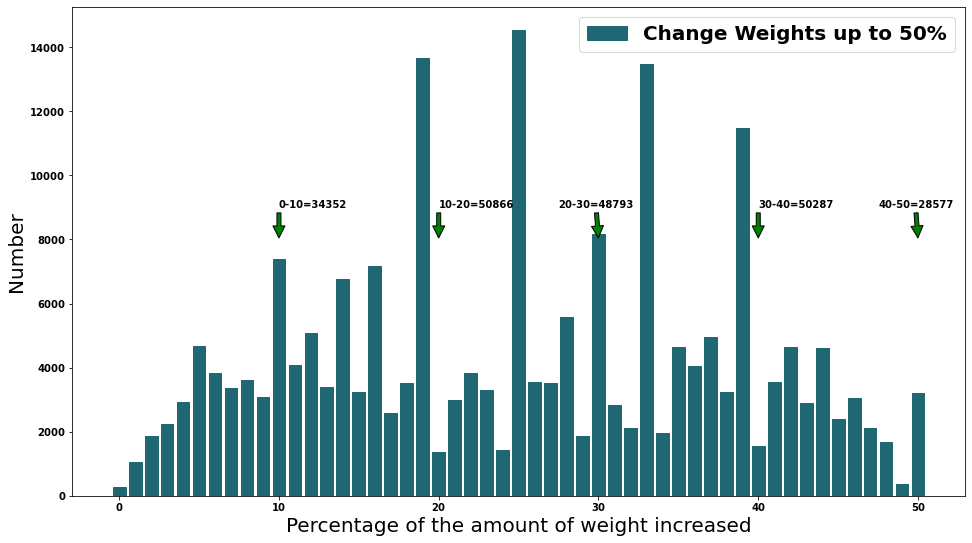

In [83]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.bar([i[0] for i in d_G_entire_50], [i[1] for i in d_G_entire_50], label='Change Weights up to 50%', facecolor='#206774', edgecolor='#206774')
ax.set_xlabel('Percentage of the amount of weight increased', fontsize=20)
ax.set_ylabel('Number',fontsize=20)
ax.annotate('0-10='+str(a_10), xy =(10, 8000), xytext =(10, 9000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('10-20='+str(a_20), xy =(20, 8000), xytext =(20, 9000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('20-30='+str(a_30), xy =(30, 8000), xytext =(27.5, 9000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('30-40='+str(a_40), xy =(40, 8000), xytext =(40, 9000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('40-50='+str(a_50), xy =(50, 8000), xytext =(47.5, 9000), arrowprops = dict(facecolor ='green',shrink = 0.05))
plt.rc('font', weight='bold')
ax.legend(fontsize=20)
plt.savefig('G_unw_entire_50_weight_d.pdf')

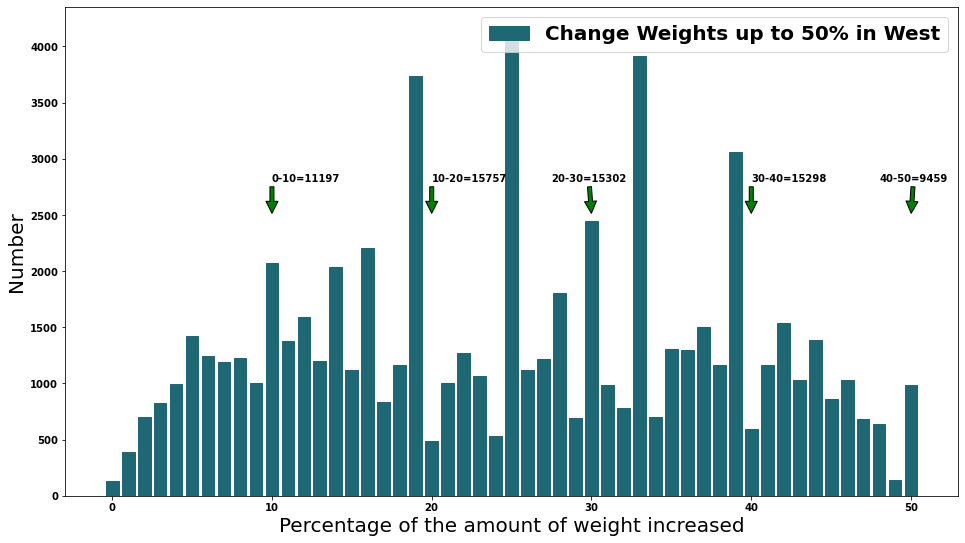

In [85]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.bar([i[0] for i in d_G_w_50], [i[1] for i in d_G_w_50], label='Change Weights up to 50% in West', facecolor='#206774', edgecolor='#206774')
ax.set_xlabel('Percentage of the amount of weight increased', fontsize=20)
ax.set_ylabel('Number',fontsize=20)
ax.annotate('0-10='+str(a_w_10), xy =(10, 2500), xytext =(10, 2800), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('10-20='+str(a_w_20), xy =(20, 2500), xytext =(20, 2800), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('20-30='+str(a_w_30), xy =(30, 2500), xytext =(27.5, 2800), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('30-40='+str(a_w_40), xy =(40, 2500), xytext =(40, 2800), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('40-50='+str(a_w_50), xy =(50, 2500), xytext =(48, 2800), arrowprops = dict(facecolor ='green',shrink = 0.05))
plt.rc('font', weight='bold')
ax.legend(fontsize=20)
plt.savefig('G_unw_west_50_weight_d.pdf')

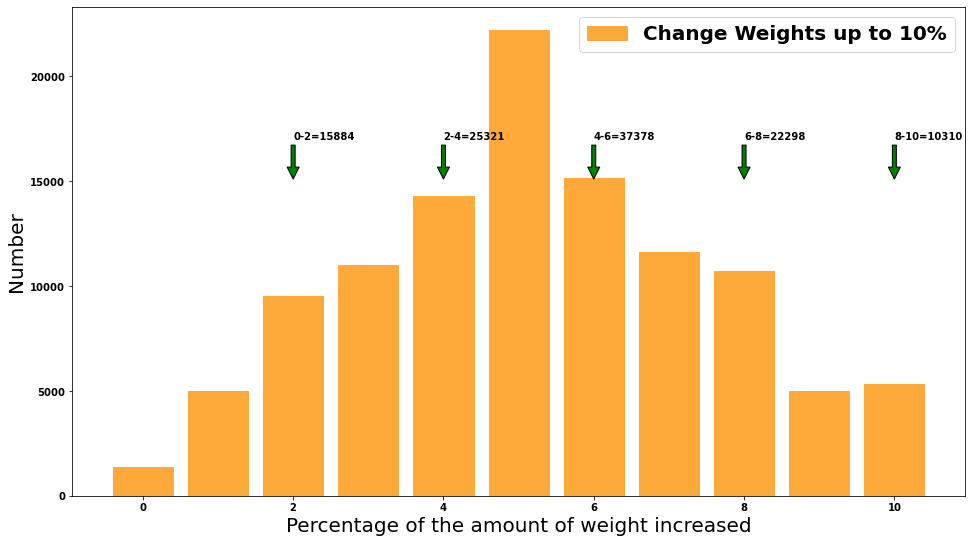

In [86]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.bar([i[0] for i in d_G_entire_10], [i[1] for i in d_G_entire_10], label='Change Weights up to 10%', facecolor='#FDAA3A', edgecolor='#FDAA3A')
ax.set_xlabel('Percentage of the amount of weight increased', fontsize=20)
ax.set_ylabel('Number',fontsize=20)
ax.annotate('0-2='+str(b_2), xy =(2, 15000), xytext =(2, 17000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('2-4='+str(b_4), xy =(4, 15000), xytext =(4, 17000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('4-6='+str(b_6), xy =(6, 15000), xytext =(6, 17000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('6-8='+str(b_8), xy =(8, 15000), xytext =(8, 17000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('8-10='+str(b_10), xy =(10, 15000), xytext =(10, 17000), arrowprops = dict(facecolor ='green',shrink = 0.05))
plt.rc('font', weight='bold')
ax.legend(fontsize=20)
plt.savefig('G_unw_entire_10_weight_d.pdf')

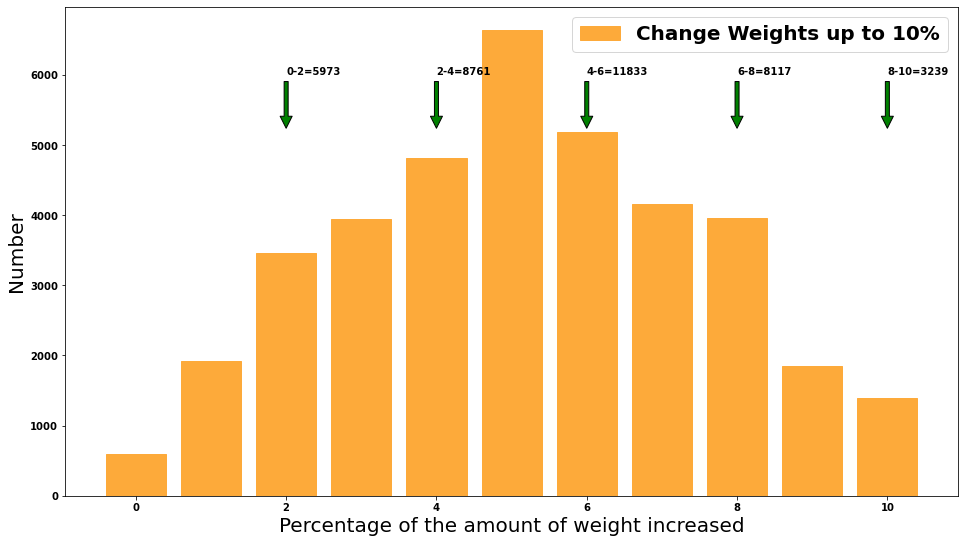

In [89]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.bar([i[0] for i in d_G_w_10], [i[1] for i in d_G_w_10], label='Change Weights up to 10%', facecolor='#FDAA3A', edgecolor='#FDAA3A')
ax.set_xlabel('Percentage of the amount of weight increased', fontsize=20)
ax.set_ylabel('Number',fontsize=20)
ax.annotate('0-2='+str(b_w_2), xy =(2, 5200), xytext =(2, 6000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('2-4='+str(b_w_4), xy =(4, 5200), xytext =(4, 6000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('4-6='+str(b_w_6), xy =(6, 5200), xytext =(6, 6000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('6-8='+str(b_w_8), xy =(8, 5200), xytext =(8, 6000), arrowprops = dict(facecolor ='green',shrink = 0.05))
ax.annotate('8-10='+str(b_w_10), xy =(10, 5200), xytext =(10, 6000), arrowprops = dict(facecolor ='green',shrink = 0.05))
plt.rc('font', weight='bold')
ax.legend(fontsize=20)
plt.savefig('G_unw_west_10_weight_d.pdf')

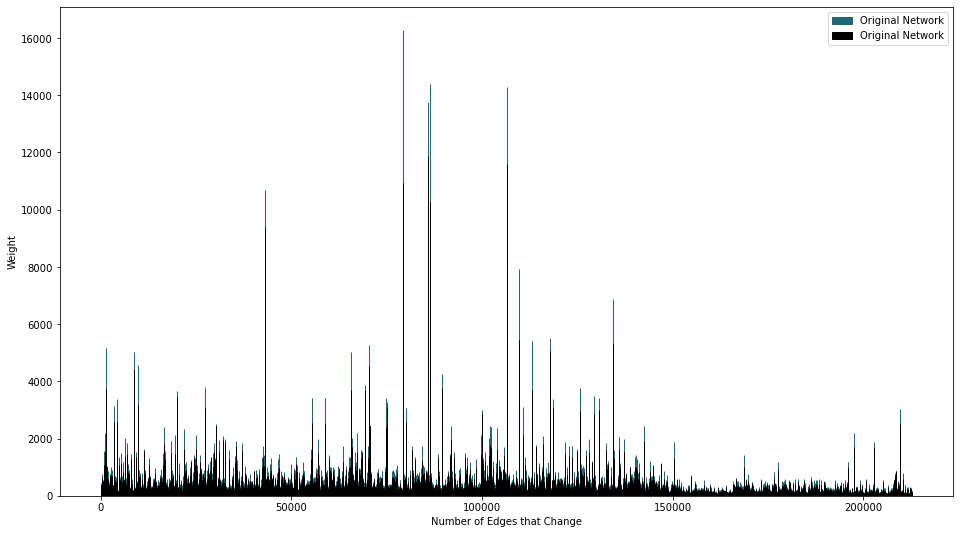

In [18]:
#plot
x=np.arange(1, len(w_t_G_entire_50)+1, 1).tolist()
fig, ax = plt.subplots(1,1,figsize=(16,9))
G_entire_50_plot=ax.bar(x, [i[1] for i in w_t_G_entire_50],width=0.5, label='Original Network', facecolor='#206774', edgecolor='#206774')
G_o_plot=ax.bar(x, [i[0] for i in w_t_G_entire_50], label='Original Network', facecolor='black', edgecolor='black')
#ax.set_yscale('log')
ax.set_ylabel('Weight')
ax.set_xlabel('Number of Edges that Change')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
ax.legend()
plt.show()

#ax.bar_label(rects1, padding=3)

In [107]:
   
    
#the above consideration does not give an standard distribution for the values of eprcentages 
#but it should be standard(gaussian)

#So the problem is with the int() issue we should use ranges as we do not know the exact percentage for each weight
#now. it means if 30=int(d) then 30<d<31

''' w_n=w_o + int(w_o * m/100)
 m= anumber in range up to a percentage (1,a+1) for example here a= 10, 50
 as a result: w_n - w_o= int(w_o * m/100) so: w_n-w_o<= w_o * m/100 <'w_n - w_o +1'''

p_r_G_entire_10=[] #r=range
p_r_G_entire_50=[]
p_r_G_w_10=[]
p_r_G_w_50=[]

for item in w_t_G_entire_10:
     p_r_G_entire_10.append((float(((item[1]-item[0])/item[0])*100),float(((item[1]-item[0]+1)/item[0])*100)))
for item in w_t_G_entire_50:
     p_r_G_entire_50.append((float(((item[1]-item[0])/item[0])*100),float(((item[1]-item[0]+1)/item[0])*100)))
for item in w_t_G_w_10:
     p_r_G_w_10.append((float(((item[1]-item[0])/item[0])*100),float(((item[1]-item[0]+1)/item[0])*100)))
for item in w_t_G_w_50:
     p_r_G_w_50.append((float(((item[1]-item[0])/item[0])*100),float(((item[1]-item[0]+1)/item[0])*100)))
        

    
#so I will change weights of the original network and will save the value of the percentage during the process
#function to change weight and report the percentage value
def add_un_to_edge_weight_reporta(a,region,DG): 
    DG_IT=copy.deepcopy(DG) 
    region=str(region)
    percentage_list=[]
    for (u,v) in DG_IT.edges(): 
        if DG_IT.nodes[u]['region']==region:
            if DG_IT.nodes[v]['region']==region:
                percent_value=random.randrange(1,a+1)
                percentage_list.append(percent_value)
                DG_IT[u][v]['weight']=int(DG_IT[u][v]['weight']*(percent_value/100)) + DG_IT[u][v]['weight']
    return DG_IT, percentage_list 
def change_weight_entire_reporta(Graph,a):
    G1=Graph.copy()
    percentage_list=[]
    for (u,v) in G1.edges():
        percent_value=random.randrange(1,a+1)
        percentage_list.append(percent_value)
        G1[u][v]['weight']+=int(G1[u][v]['weight']*(percent_value/100))
    return G1, percentage_list

g, percent_G_w_entire_10=change_weight_entire_reporta(G_o,10)
g1, percent_G_w_entire_50=change_weight_entire_reporta(G_o,50)
g2, percent_G_w_w_10=add_un_to_edge_weight_reporta(10,'West',G_o)
g3, percent_G_w_w_50=add_un_to_edge_weight_reporta(50,'West',G_o)  

r_d_G_entire_10=dist_type(percent_G_w_entire_10) #r=report a
r_d_G_entire_50=dist_type(percent_G_w_entire_50)
r_d_G_w_10=dist_type(percent_G_w_w_10)
r_d_G_w_50=dist_type(percent_G_w_w_50)

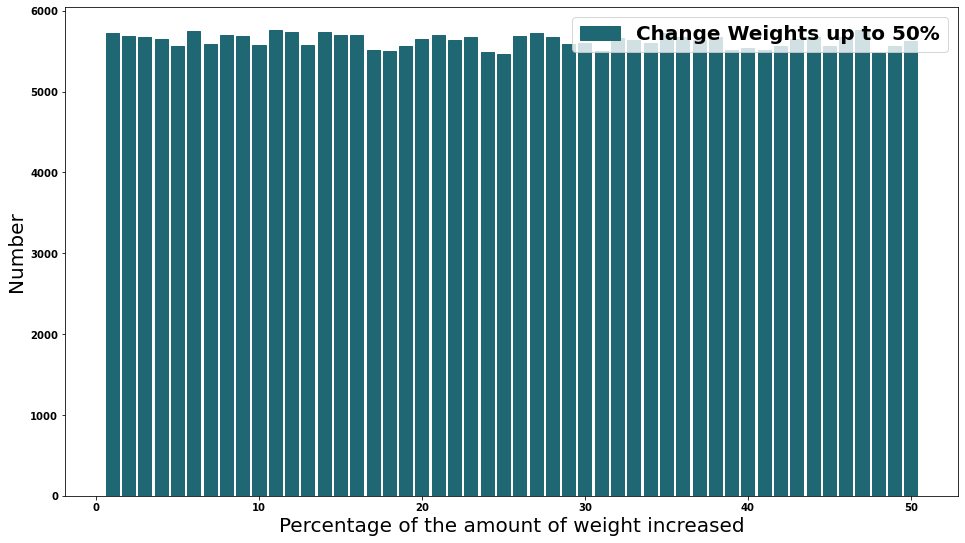

In [122]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.bar([i[0] for i in r_d_G_entire_50], [i[1] for i in r_d_G_entire_50], label='Change Weights up to 50%', facecolor='#206774', edgecolor='#206774')
ax.set_xlabel('Percentage of the amount of weight increased', fontsize=20)
ax.set_ylabel('Number',fontsize=20)
plt.rc('font', weight='bold')
ax.legend(fontsize=20)
plt.savefig('G_unw_entire_50_weight_d_reporta.pdf')

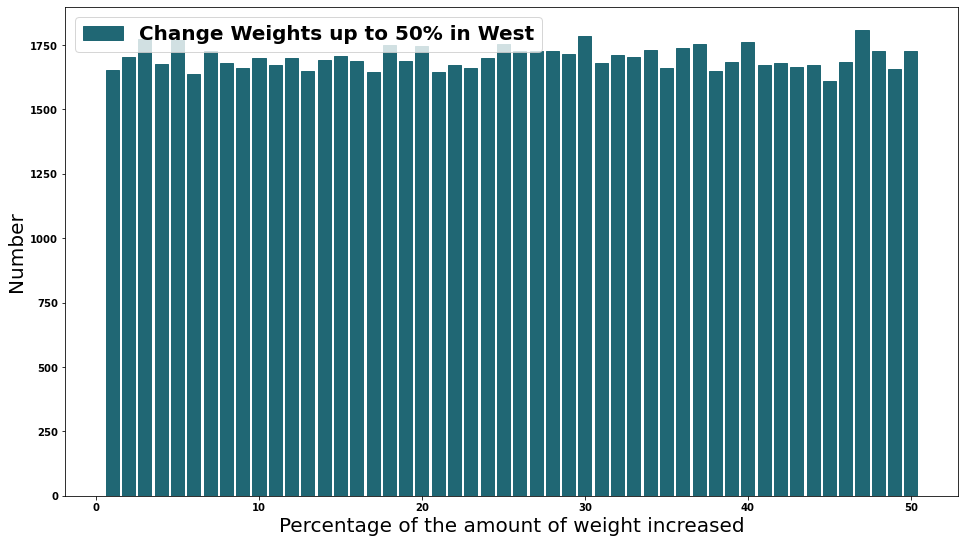

In [123]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.bar([i[0] for i in r_d_G_w_50], [i[1] for i in r_d_G_w_50], label='Change Weights up to 50% in West', facecolor='#206774', edgecolor='#206774')
ax.set_xlabel('Percentage of the amount of weight increased', fontsize=20)
ax.set_ylabel('Number',fontsize=20)
plt.rc('font', weight='bold')
ax.legend(fontsize=20)
plt.savefig('G_unw_west_50_weight_d_reporta.pdf')

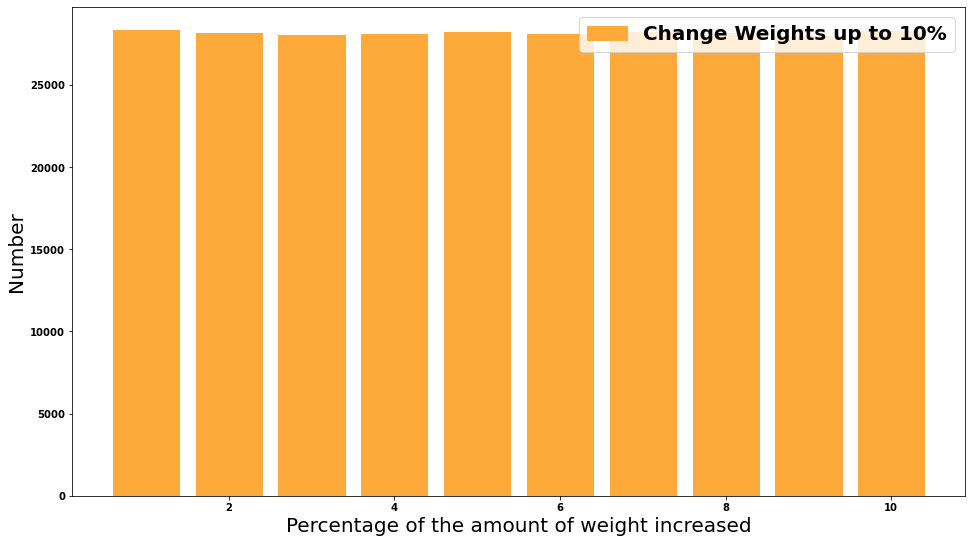

In [125]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.bar([i[0] for i in r_d_G_entire_10], [i[1] for i in r_d_G_entire_10], label='Change Weights up to 10%', facecolor='#FDAA3A', edgecolor='#FDAA3A')
ax.set_xlabel('Percentage of the amount of weight increased', fontsize=20)
ax.set_ylabel('Number',fontsize=20)
plt.rc('font', weight='bold')
ax.legend(fontsize=20)
plt.savefig('G_unw_entire_10_weight_d_reporta.pdf')

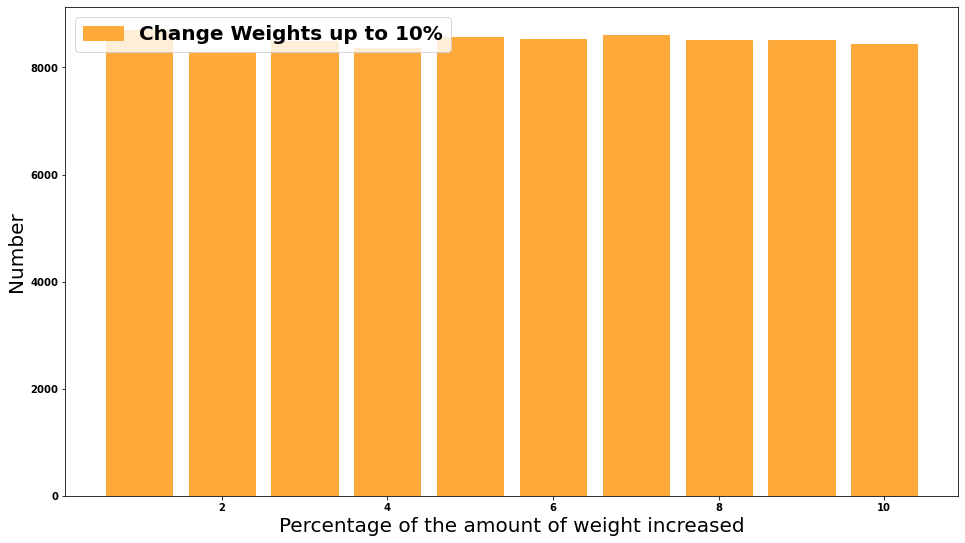

In [126]:
fig, ax = plt.subplots(1,1,figsize=(16,9))
ax.bar([i[0] for i in r_d_G_w_10], [i[1] for i in r_d_G_w_10], label='Change Weights up to 10%', facecolor='#FDAA3A', edgecolor='#FDAA3A')
ax.set_xlabel('Percentage of the amount of weight increased', fontsize=20)
ax.set_ylabel('Number',fontsize=20)
plt.rc('font', weight='bold')
ax.legend(fontsize=20)
plt.savefig('G_unw_west_10_weight_d_reporta.pdf')

In [127]:
df

,Serie_e_Numero_da_GTA,Data_de_emissao,Especie,Finalidade,Meio_de_Transporte,Machos_De_0_a_12,Femeas_De_0_a_12,Machos_De_13_a_24,Femeas_De_13_a_24,Machos_De_25_a_36,...,dia,NDATE_D,DAY,WEEK,MONTH,NDATE_W,NDATE_M,N_Finalidade,BDAY,NDATE_B
0,b'B - 291012',b'2013/09/05 12:41:13.615',b'BOVINO',b'REPRODUCAO',b'A PE',8,7,5,6,0,...,5,b'2013-09-05',247,35,8,b'2013-02-05',b'2013-01-09',b'REPRODUCAO',178.0,b'2013-09-05'
1,b'A - 846796',b'2013/04/17 14:39:39.931',b'BOVINO',b'ENGORDA',b'RODOVIARIO',2,0,3,0,2,...,17,b'2013-04-17',106,15,3,b'2013-01-16',b'2013-01-04',b'ENGORDA',77.0,b'2013-04-17'
2,b'A - 878670',b'2013/04/25 10:37:48.504',b'BOVINO',b'RECRIA',b'A PE',0,0,0,10,0,...,25,b'2013-04-25',114,16,4,b'2013-01-17',b'2013-01-05',b'RECRIA',83.0,b'2013-04-25'
3,b'A - 835267',b'2013/04/15 10:02:39.721',b'BOVINO',b'ENGORDA',b'RODOVIARIO',0,0,0,0,0,...,15,b'2013-04-15',104,14,3,b'2013-01-15',b'2013-01-04',b'ENGORDA',75.0,b'2013-04-15'
4,b'A - 835292',b'2013/04/15 10:04:38.53',b'BOVINO',b'ENGORDA',b'RODOVIARIO',0,0,0,0,0,...,15,b'2013-04-15',104,14,3,b'2013-01-15',b'2013-01-04',b'ENGORDA',75.0,b'2013-04-15'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3865031,b'D - 891485',b'2015/12/30 09:57:38.866',b'BOVINO',b'ABATE',b'RODOVIARIO',0,0,0,0,0,...,30,b'2015-12-30',1093,156,39,b'2013-06-06',b'2013-02-09',b'ABATE',782.0,b'2015-12-30'
3865032,b'D - 891490',b'2015/12/30 09:58:08.773',b'BOVINO',b'ABATE',b'RODOVIARIO',0,0,0,0,0,...,30,b'2015-12-30',1093,156,39,b'2013-06-06',b'2013-02-09',b'ABATE',782.0,b'2015-12-30'
3865033,b'D - 891516',b'2015/12/30 09:59:54.115',b'BOVINO',b'ABATE',b'RODOVIARIO',0,0,0,0,27,...,30,b'2015-12-30',1093,156,39,b'2013-06-06',b'2013-02-09',b'ABATE',782.0,b'2015-12-30'
3865034,b'B - 735823',b'2014/02/20 13:59:12.231',b'BOVINO',b'ABATE',b'RODOVIARIO',0,0,0,0,0,...,20,b'2014-02-20',415,59,14,b'2013-03-01',b'2013-01-15',b'ABATE',298.0,b'2014-02-20'


In [2]:
test1=nx.MultiDiGraph()
test1.add_edges_from([(1,2,{'m':'w'}),(1,2,{'m':'e'}),(2,3,{'m':'e'}),(4,5,{'m':'r'}),(3,6,{'m':'r'}),(1,3,{'m':'e'})])

[0, 1, 0, 0, 0, 0]

In [3]:
test2=nx.line_graph(test1)

In [4]:
test2.edges()

OutMultiEdgeDataView([((1, 2, 0), (2, 3, 0)), ((2, 3, 0), (3, 6, 0)), ((1, 2, 1), (2, 3, 0)), ((1, 3, 0), (3, 6, 0))])

In [5]:
test2.nodes()

NodeView(((1, 2, 0), (2, 3, 0), (1, 2, 1), (1, 3, 0), (3, 6, 0), (4, 5, 0)))

# New experiment for adding missing links and addming missing nodes for 
# edges and nodes that are existed in the dataset but are not existed in the part of dataset we are using


In [ ]:
#add missing nodes from the nodes are in the dataset but are not existed in the period of 6 months 2013.
#how to connect the new node: the new node will be connect to the set of nodes they have connection with them in the 4 years real data

In [85]:
data=pd.read_csv('Clean_dataset/clean_data_comprehensive.csv')

dc_Meso_index= pd.read_excel('dc_Meso_index.xlsx').set_index('Mesoregion') 
center_list_code=list(dc_Meso_index.loc[['Central Mineira','Metropolitana de Belo Horizonte'],'city_code']) 
north_list_code=list(dc_Meso_index.loc[['Noroeste de Minas','Norte de Minas'],'city_code']) 
east_list_code=list(dc_Meso_index.loc[['Jequitinhonha','Vale do Mucuri','Vale do Rio Doce'],'city_code']) 
south_list_code=list(dc_Meso_index.loc[['Campo das Vertentes','Oeste de Minas','Sul/​Sudoeste de Minas','Zona da Mata'],'city_code']) 
west_list_code=list(dc_Meso_index.loc[['Triângulo Mineiro/​Alto Paranaiba'],'city_code'])

#add columns of origin region and destination region to the dataset

data_month0=data[data['MONTH']==0]

#edges_list_label=pd.DataFrame(data_month1.groupby(\
#['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino']).agg(weight=('animais','sum')).reset_index())
#because we did not used the animal number in making the flow map I use just movement as weight
edges_list_label=pd.DataFrame(data_month0.groupby(\
['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino']).agg(weight=('animais','sum')).reset_index(drop=True))

G_30day=nx.DiGraph()
for i in range(len(edges_list_label)):
    G_30day.add_edge(edges_list_label['Codigo_do_Local_de_Origem'][i],\
        edges_list_label['Codigo_do_Local_de_Destino'][i],\
                    weight=edges_list_label["weight"][i]) 
           
#find the list of edges that are part of dataset but are not active in this part (month0) of dataset we are working with
edges_list_label_all=pd.DataFrame(data.groupby(\
['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino']).agg(weight=('animais','sum')).reset_index(drop=True))
#removing the active edges(the one related to the part we like (month0) from the all edges in the network)
'''df1=pd.DataFrame([[1,2],[3,4],[5,6]],columns=['a','b'])
df2=pd.DataFrame([[1,2],[5,6],[7,8]],columns=['a','b'])
pd.concat([df1, df2, df2]).drop_duplicates(keep=False)
a:3,b:4'''
#this list include all nodes of the network ممکنه یخشس از این نود ها تو این نتورک یک ماهه اصلا وجود نداشته باشن و وقتی ما لینک اضافه میمنیم نود جدید هم اضافه بشه
edge_list_inactive=pd.concat([edges_list_label_all, edges_list_label, edges_list_label]).drop_duplicates(keep=False).reset_index(drop=True)
#حل مشکل بالا. پیدا کردن لیست لینک های غیر فعالی که فقط بین نود ها فعال سیستم وحود دارند
node_all_m0=G_30day.nodes()
edge_list_inactive_m0=[]
for i in range(len(edge_list_inactive)):
    if edge_list_inactive.loc[i,'Codigo_do_Local_de_Origem'] in node_all_m0:
        if edge_list_inactive.loc[i,'Codigo_do_Local_de_Destino'] in node_all_m0: 
            edge_list_inactive_m0.append((edge_list_inactive.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_list_inactive.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_list_inactive.loc[i,'weight']))






#find inactive edge list in region eat and west
#find edges of east in G
data_east_m0=data_month0[data_month0['origin_region']=='E']
data_east_m0=data_east_m0[data_east_m0['destination_region']=='E']
#list east nodes month
e_nodes_m0=list(data_east_m0['Codigo_do_Local_de_Origem'])
e_nodes_m0.extend(list(data_east_m0['Codigo_do_Local_de_Destino']))
e_nodes_m0=set(e_nodes_m0)
#list edge
edges_list_east_m0=pd.DataFrame(data_east_m0.groupby(\
['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino']).agg(weight=('animais','sum')).reset_index(drop=True))
#find edges of west in G
data_west_m0=data_month0[data_month0['origin_region']=='W']
data_west_m0=data_west_m0[data_west_m0['destination_region']=='W']
#list west nodes month
w_nodes_m0=list(data_west_m0['Codigo_do_Local_de_Origem'])
w_nodes_m0.extend(list(data_west_m0['Codigo_do_Local_de_Destino']))
w_nodes_m0=set(w_nodes_m0)
#list edge
edges_list_west_m0=pd.DataFrame(data_west_m0.groupby(\
['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino']).agg(weight=('animais','sum')).reset_index(drop=True))

#make east dataset
data_east=data[data['origin_region']=='E']
data_east=data_east[data_east['destination_region']=='E']
edges_list_all_east=pd.DataFrame(data_east.groupby(\
['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino']).agg(weight=('animais','sum')).reset_index(drop=True))
edge_list_inactive_east=pd.concat([edges_list_all_east, edges_list_label, edges_list_label]).drop_duplicates(keep=False).reset_index(drop=True)
edge_list_inactive_e_m0=[]
for i in range(len(edge_list_inactive_east)):
    if edge_list_inactive_east.loc[i,'Codigo_do_Local_de_Origem'] in e_nodes_m0:
        if edge_list_inactive_east.loc[i,'Codigo_do_Local_de_Destino'] in e_nodes_m0: 
            edge_list_inactive_e_m0.append((edge_list_inactive_east.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_list_inactive_east.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_list_inactive_east.loc[i,'weight']))


#make west dataset
data_west=data[data['origin_region']=='W']
data_west=data_west[data_west['destination_region']=='W']
edges_list_all_west=pd.DataFrame(data_west.groupby(\
['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino']).agg(weight=('animais','sum')).reset_index(drop=True))
edge_list_inactive_west=pd.concat([edges_list_all_west, edges_list_label, edges_list_label]).drop_duplicates(keep=False).reset_index(drop=True)
edge_list_inactive_w_m0=[]
for i in range(len(edge_list_inactive_west)):
    if edge_list_inactive_west.loc[i,'Codigo_do_Local_de_Origem'] in w_nodes_m0:
        if edge_list_inactive_west.loc[i,'Codigo_do_Local_de_Destino'] in w_nodes_m0: 
            edge_list_inactive_w_m0.append((edge_list_inactive_west.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_list_inactive_west.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_list_inactive_west.loc[i,'weight']))


            
            


In [144]:
#change weights
#region
def add_un_to_edge_weight_region(a,region,DG): 
    DG_IT=copy.deepcopy(DG) 
    for (u,v) in DG_IT.edges(): 
        if u in region:
            if v in region:
                DG_IT[u][v]['weight']+=int(DG_IT[u][v]['weight'])*(random.randrange(1,a+1)/100)
    return DG_IT 
def change_weight_entire_just(Graph,a):
    G1=Graph.copy()
    for (u,v) in G1.edges():
        G1[u][v]['weight']+=int(G1[u][v]['weight']*(random.randrange(1,a+1)/100))
    return G1

G_30day_w10_entire=change_weight_entire_just(G_30day,10)
G_30day_w50_entire=change_weight_entire_just(G_30day,50)
G_30day_w10_e=add_un_to_edge_weight_region(10, e_nodes_m0,G_30day)
G_30day_w50_e=add_un_to_edge_weight_region(50, e_nodes_m0,G_30day)
G_30day_w10_w=add_un_to_edge_weight_region(10, w_nodes_m0,G_30day)
G_30day_w50_w=add_un_to_edge_weight_region(50, w_nodes_m0,G_30day)

In [146]:
#df, df_mean, df_min, df_max=multiran_result_SI(G_30day,IN_IN_risk_region)
df_un10_w, df_un10_w_mean, df_un10_w_min,df_un10_w_max=multiran_result_SI(G_30day_w10_w,IN_IN_risk_region)
df_un50_w, df_un50_w_mean, df_un50_w_min,df_un50_w_max=multiran_result_SI(G_30day_w50_w,IN_IN_risk_region)
df_un10_entire, df_un10_entire_mean, df_un10_entire_min,df_un10_entire_max=multiran_result_SI(G_30day_w10_entire,IN_IN_risk_region)
df_un50_entire, df_un50_entire_mean, df_un50_entire_min,df_un50_entire_max=multiran_result_SI(G_30day_w50_entire,IN_IN_risk_region)
df_un10_e, df_un10_e_mean, df_un10_e_min,df_un10_e_max=multiran_result_SI(G_30day_w10_e,IN_IN_risk_region)
df_un50_e, df_un50_e_mean, df_un50_e_min,df_un50_e_max=multiran_result_SI(G_30day_w50_e,IN_IN_risk_region)

In [148]:
df, df_mean, df_min, df_max=multiran_result_SI(G_30day,IN_IN_risk_region)

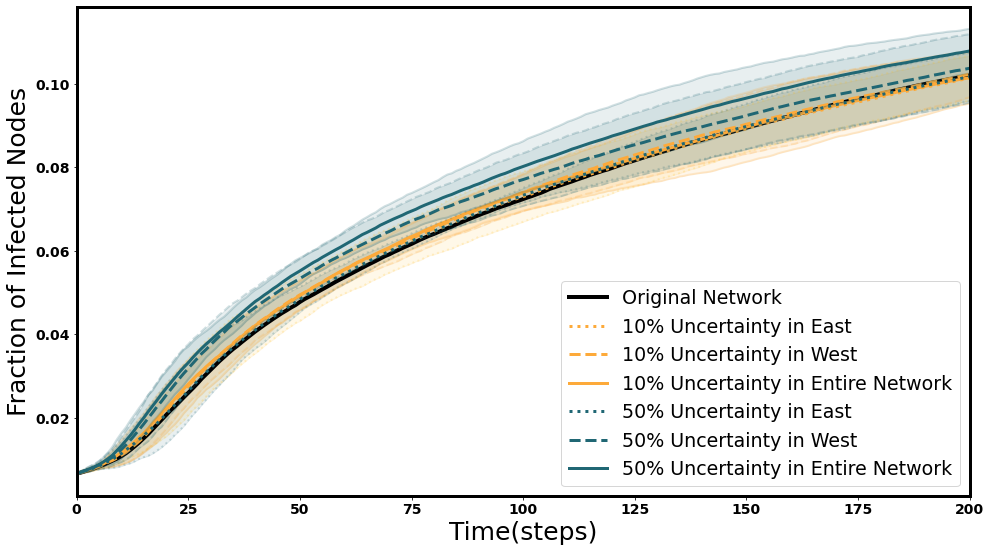

In [152]:
#scatter plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot(df['time'].index, df_mean,c='black',label='Original Network',linewidth=4.0)
#plt.fill_between(df.index, df_min, df_max, color='blue', alpha=.2)


plt.plot(df_un10_e['time'], df_un10_e_mean,c='#FDAA3A',label='10% Uncertainty in East',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_un10_e['time'], df_un10_e_min, df_un10_e_max, color='#FFC125', alpha=.1)
plt.plot(df['time'], df_un10_e_min,c='#FFC125',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_un10_e_max,c='#FFC125',linewidth=2.0,linestyle='dotted',alpha=.2)


plt.plot(df_un10_w['time'], df_un10_w_mean,c='#FDAA3A',linestyle='--',label='10% Uncertainty in West',linewidth=3.0)
plt.fill_between(df_un10_w['time'], df_un10_w_min, df_un10_w_max, color='#FDAA3A', alpha=.1)
plt.plot(df['time'], df_un10_w_min,c='#FDAA3A',linewidth=2.0,linestyle='--',alpha=.2)
plt.plot(df['time'], df_un10_w_max,c='#FDAA3A',linewidth=2.0,linestyle='--',alpha=.2)


plt.plot(df_un10_entire['time'], df_un10_entire_mean,label='10% Uncertainty in Entire Network',c='#FDAA3A',linewidth=3.0)
plt.fill_between(df_un10_entire['time'], df_un10_entire_min, df_un10_entire_max, color='#FDAA3A', alpha=.1)
plt.plot(df['time'], df_un10_entire_min,c='#FDAA3A',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_un10_entire_max,c='#FDAA3A',linewidth=2.0,alpha=.2)


plt.plot(df_un50_e['time'], df_un50_e_mean,c='#206774',label='50% Uncertainty in East',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_un50_e['time'], df_un50_e_min, df_un50_e_max, color='#206774', alpha=.1)
plt.plot(df['time'], df_un50_e_min,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_un50_e_max,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)


plt.plot(df_un50_w['time'], df_un50_w_mean,c='#206774',linestyle='--', label='50% Uncertainty in West',linewidth=3.0)
plt.fill_between(df_un50_w['time'], df_un50_w_min, df_un50_w_max, color='#206774', alpha=.1)
plt.plot(df['time'], df_un50_w_min,c='#206774',linewidth=2.0,linestyle='--',alpha=.2)
plt.plot(df['time'], df_un50_w_max,c='#206774',linewidth=2.0,linestyle='--',alpha=.2)


plt.plot(df_un50_entire['time'], df_un50_entire_mean,label='50% Uncertainty in Entire Network',c='#206774',linewidth=3.0)
plt.fill_between(df_un50_entire['time'], df_un50_entire_min, df_un50_entire_max, color='#206774', alpha=.1)
plt.plot(df['time'], df_un50_entire_min,c='#206774',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_un50_entire_max,c='#206774',linewidth=2.0,alpha=.2)








plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_month0_SI_un_weight_10&50_0.001_w_e_modify.pdf')

In [87]:
#add missing link based on the inactive edges
#add to the entire network 10%, 30%
n_edge=G_30day.number_of_edges()
#entire 10%
a=10
l_edge=random.sample(edge_list_inactive_m0,round(n_edge*(a/100)))
G_30day_miss10_entire=G_30day.copy()
G_30day_miss10_entire.add_weighted_edges_from(l_edge)

#entire 30%
a=30
l_edge=random.sample(edge_list_inactive_m0,round(n_edge*(a/100)))
G_30day_miss30_entire=G_30day.copy()
G_30day_miss30_entire.add_weighted_edges_from(l_edge)

#east
#dilema. when we are adding the link to east from the links already exist in dataset but inactive. we should be carefull 
#about this fact that we should add those edges of east that the nodes already are in our network not the ones that add new
#node to the network
n_edge=len(edges_list_east_m0)
a=10
l_edge=random.sample(edge_list_inactive_e_m0,round(n_edge*(a/100)))
G_30day_miss10_e=G_30day.copy()
G_30day_miss10_e.add_weighted_edges_from(l_edge)

a=30
l_edge=random.sample(edge_list_inactive_e_m0,round(n_edge*(a/100)))
G_30day_miss30_e=G_30day.copy()
G_30day_miss30_e.add_weighted_edges_from(l_edge)

#west
n_edge=len(edges_list_west_m0)
a=10
l_edge=random.sample(edge_list_inactive_w_m0,round(n_edge*(a/100)))
G_30day_miss10_w=G_30day.copy()
G_30day_miss10_w.add_weighted_edges_from(l_edge)

a=30
l_edge=random.sample(edge_list_inactive_w_m0,round(n_edge*(a/100)))
G_30day_miss30_w=G_30day.copy()
G_30day_miss30_w.add_weighted_edges_from(l_edge)




In [145]:
IN_IN_risk_region=random.sample(e_nodes_m0,100)+random.sample(w_nodes_m0,100)

In [110]:
data_c_m0=data_month0[data_month0['origin_region']=='C']
data_c_m0=data_c_m0[data_c_m0['destination_region']=='C']
#list east nodes month
c_nodes_m0=list(data_c_m0['Codigo_do_Local_de_Origem'])
c_nodes_m0.extend(list(data_c_m0['Codigo_do_Local_de_Destino']))
c_nodes_m0=set(c_nodes_m0)

data_s_m0=data_month0[data_month0['origin_region']=='S']
data_s_m0=data_s_m0[data_s_m0['destination_region']=='S']
#list east nodes month
s_nodes_m0=list(data_s_m0['Codigo_do_Local_de_Origem'])
s_nodes_m0.extend(list(data_s_m0['Codigo_do_Local_de_Destino']))
s_nodes_m0=set(s_nodes_m0)

In [153]:
#df, df_mean, df_min, df_max=multiran_result_SI(G_30day,IN_IN_risk_region)
df_un10_w, df_un10_w_mean, df_un10_w_min,df_un10_w_max=multiran_result_SI(G_30day_miss10_w,IN_IN_risk_region)
df_un50_w, df_un50_w_mean, df_un50_w_min,df_un50_w_max=multiran_result_SI(G_30day_miss30_w,IN_IN_risk_region)
df_un10_entire, df_un10_entire_mean, df_un10_entire_min,df_un10_entire_max=multiran_result_SI(G_30day_miss10_entire,IN_IN_risk_region)
df_un50_entire, df_un50_entire_mean, df_un50_entire_min,df_un50_entire_max=multiran_result_SI(G_30day_miss30_entire,IN_IN_risk_region)
df_un10_e, df_un10_e_mean, df_un10_e_min,df_un10_e_max=multiran_result_SI(G_30day_miss10_e,IN_IN_risk_region)
df_un50_e, df_un50_e_mean, df_un50_e_min,df_un50_e_max=multiran_result_SI(G_30day_miss30_e,IN_IN_risk_region)

In [173]:
import pickle
with open ('real_network/epi_network_just10%_miss_month0_west', 'wb') as fp:
    pickle.dump(df_un10_w, fp)
with open ('real_network/epi_network_just30%_miss_month0_west', 'wb') as fp:
    pickle.dump(df_un50_w, fp)
with open ('real_network/epi_network_just10%_miss_month0_east', 'wb') as fp:
    pickle.dump(df_un10_e, fp)
with open ('real_network/epi_network_just30%_miss_month0_east', 'wb') as fp:
    pickle.dump(df_un50_e, fp)
with open ('real_network/epi_network_just10%_miss_month0_entire', 'wb') as fp:
    pickle.dump(df_un10_entire, fp)
with open ('real_network/epi_network_just30%_miss_month0_entire', 'wb') as fp:
    pickle.dump(df_un50_entire, fp)

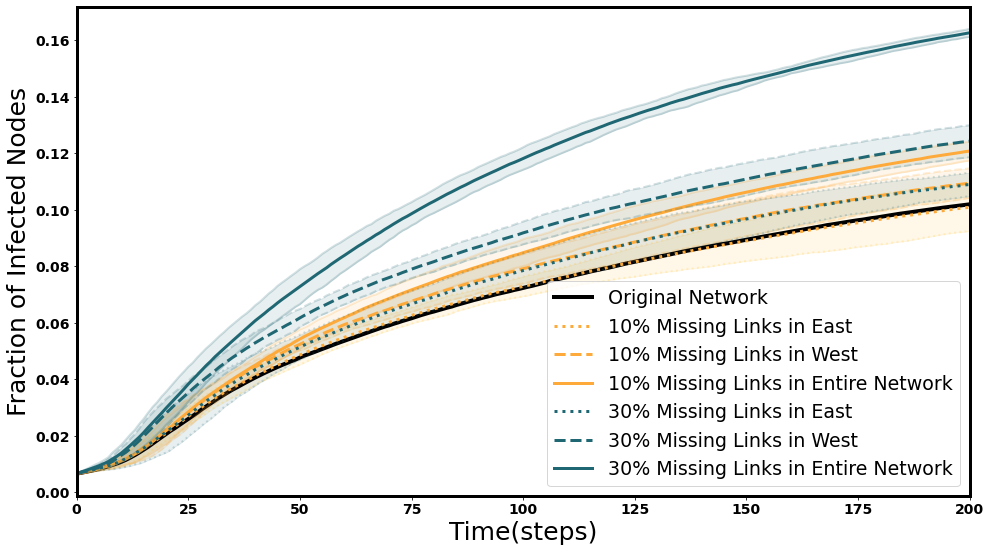

In [154]:
#plot

fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot(df['time'], df_mean,c='black',label='Original Network',linewidth=4.0)
plt.plot(df_un10_e['time'], df_un10_e_mean,c='#FDAA3A',label='10% Missing Links in East',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_un10_e['time'], df_un10_e_min, df_un10_e_max, color='#FFC125', alpha=.1)
plt.plot(df['time'], df_un10_e_min,c='#FFC125',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_un10_e_max,c='#FFC125',linewidth=2.0,linestyle='dotted',alpha=.2)


plt.plot(df_un10_w['time'], df_un10_w_mean,c='#FDAA3A',linestyle='--',label='10% Missing Links in West',linewidth=3.0)
plt.fill_between(df_un10_w['time'], df_un10_w_min, df_un10_w_max, color='#FDAA3A', alpha=.1)
plt.plot(df['time'], df_un10_w_min,c='#FDAA3A',linewidth=2.0,linestyle='--',alpha=.2)
plt.plot(df['time'], df_un10_w_max,c='#FDAA3A',linewidth=2.0,linestyle='--',alpha=.2)

plt.plot(df_un10_entire['time'], df_un10_entire_mean,label='10% Missing Links in Entire Network',c='#FDAA3A',linewidth=3.0)
plt.fill_between(df_un10_entire['time'], df_un10_entire_min, df_un10_entire_max, color='#FDAA3A', alpha=.1)
plt.plot(df['time'], df_un10_entire_min,c='#FDAA3A',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_un10_entire_max,c='#FDAA3A',linewidth=2.0,alpha=.2)


plt.plot(df_un50_e['time'], df_un50_e_mean,c='#206774',label='30% Missing Links in East',linestyle='dotted',linewidth=3.0)
plt.fill_between(df_un50_e['time'], df_un50_e_min, df_un50_e_max, color='#206774', alpha=.1)
plt.plot(df['time'], df_un50_e_min,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df_un50_e_max,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)


plt.plot(df_un50_w['time'], df_un50_w_mean,c='#206774',linestyle='--', label='30% Missing Links in West',linewidth=3.0)
plt.fill_between(df_un50_w['time'], df_un50_w_min, df_un50_w_max, color='#206774', alpha=.1)
plt.plot(df['time'], df_un50_w_min,c='#206774',linewidth=2.0,linestyle='--',alpha=.2)
plt.plot(df['time'], df_un50_w_max,c='#206774',linewidth=2.0,linestyle='--',alpha=.2)



plt.plot(df_un50_entire['time'], df_un50_entire_mean,label='30% Missing Links in Entire Network',c='#206774',linewidth=3.0)
plt.fill_between(df_un50_entire['time'], df_un50_entire_min, df_un50_entire_max, color='#206774', alpha=.1)
plt.plot(df['time'], df_un50_entire_min,c='#206774',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_un50_entire_max,c='#206774',linewidth=2.0,alpha=.2)



plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
plt.xlim(0,200)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_month0_SI_0.001_just_missing_w_e_100ININ_10_30_modify.jpg')

In [232]:
#missing node
            
#make the node list for adding missing nodes
#we need to find the new nodes form inactive nodes that have edges to the already existed active nodes in the month0.
#first remove the inactive edges (links between the active nodes of network month0 (the links are not existed in network month0))
edge_list_inactive_m0_df=pd.DataFrame(edge_list_inactive_m0,columns=['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino','weight'])
#del edge_list_inactive['index']
edge_list_inactive_noactive_node_both_side=pd.concat([edge_list_inactive, edge_list_inactive_m0_df, edge_list_inactive_m0_df]).drop_duplicates(keep=False).reset_index(drop=True)
#make edges list for each edges one side it is an inactive node and one side it is an active node(month0)
edge_list_inactive_active_link=[]
for i in range(len(edge_list_inactive_noactive_node_both_side)):
    if edge_list_inactive_noactive_node_both_side.loc[i,'Codigo_do_Local_de_Origem'] in node_all_m0:
        edge_list_inactive_active_link.append((edge_list_inactive_noactive_node_both_side.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_list_inactive_noactive_node_both_side.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_list_inactive_noactive_node_both_side.loc[i,'weight']))

    if edge_list_inactive_noactive_node_both_side.loc[i,'Codigo_do_Local_de_Destino'] in node_all_m0: 
        edge_list_inactive_active_link.append((edge_list_inactive_noactive_node_both_side.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_list_inactive_noactive_node_both_side.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_list_inactive_noactive_node_both_side.loc[i,'weight']))
            

#make a list from inactive nodes that have link with the active nodes in our part of network(month0)
inactive_nodes_m0=[k[0] for k in edge_list_inactive_active_link]+[k[1] for k in edge_list_inactive_active_link]
#remove the active nodes
inactive_nodes_m0=list(set(inactive_nodes_m0)-set(node_all_m0))

nn=len(node_all_m0)
a=10
nmn=round((a/100)*nn)
l_n=random.sample(inactive_nodes_m0,round((a/100)*nn))
MN_edges=[]
bug=[]
rn=0
while rn<nmn:
    ni=random.sample(inactive_nodes_m0,1)
    e1=[k for k in edge_list_inactive_active_link if k[0]==ni[0]]
    e2=[k for k in edge_list_inactive_active_link if k[1]==ni[0]]
    et=e1+e2
    if len(et)>1:
        ed=random.sample(et,2)
        for ed1 in ed:
            MN_edges.append((ed1[0],\
                   ed1[1],\
                   ed1[2]))
        rn+=1
        
         
            
        
    

            
            #east inactive node


#west inactive node




    

In [233]:
MN_edges

[("b'31334022047'", "b'31334020621'", 7),
 ("b'31334022047'", "b'31334021219'", 10),
 ("b'31074061762'", "b'31074061570'", 6),
 ("b'31074061762'", "b'31074060168'", 20),
 ("b'31342022021'", "b'31428090319'", 72),
 ("b'31342022021'", "b'31342021616'", 56),
 ("b'31223060935'", "b'3'", 51),
 ("b'31223060935'", "b'3122306'", 2),
 ("b'31143031407'", "b'31412070353'", 26),
 ("b'31143031407'", "b'31143031905'", 97),
 ("b'29055'", "b'31704044300'", 5),
 ("b'29055'", "b'31704042289'", 19),
 ("b'31506040532'", "b'2484'", 8),
 ("b'31506040532'", "b'31506040930'", 10),
 ("b'22524'", "b'31209040853'", 3),
 ("b'22524'", "b'31209041013'", 22),
 ("b'31384010537'", "b'31541010446'", 25),
 ("b'31384010537'", "b'31632010420'", 105),
 ("b'31597040253'", "b'31115070558'", 2),
 ("b'31143031280'", "b'31115070558'", 1),
 ("b'31494080062'", "b'3498'", 73),
 ("b'31494080062'", "b'31367020947'", 22),
 ("b'31119030012'", "b'31119030344'", 3),
 ("b'31119030012'", "b'31119030052'", 12),
 ("b'31701072008'", "b'31295

In [228]:
ni=random.sample(inactive_nodes_m0,1)
ni

["b'31689031863'"]

In [226]:
ni=random.sample(inactive_nodes_m0,1)
e1=[k for k in edge_list_inactive_active_link if k[0]==ni]
e2=[k for k in edge_list_inactive_active_link if k[1]==ni]
e1

[]

In [224]:
edge_list_inactive_active_link

[("b'1663'", "b'1883'", 20),
 ("b'1663'", "b'267'", 100),
 ("b'1663'", "b'31008070098'", 2),
 ("b'1663'", "b'31019040332'", 16),
 ("b'1663'", "b'31071090734'", 2),
 ("b'1663'", "b'31112000389'", 4),
 ("b'1663'", "b'3935'", 40),
 ("b'177'", "b'31035042968'", 4),
 ("b'179'", "b'31499030095'", 10),
 ("b'184'", "b'31405060020'", 1),
 ("b'1883'", "b'31019040149'", 20),
 ("b'1883'", "b'31019040221'", 77),
 ("b'1883'", "b'31019040272'", 12),
 ("b'1883'", "b'31019040280'", 37),
 ("b'1883'", "b'31019040322'", 282),
 ("b'1883'", "b'31019040413'", 575),
 ("b'1883'", "b'31019040869'", 135),
 ("b'1883'", "b'31019040975'", 10),
 ("b'1883'", "b'31019041050'", 337),
 ("b'1883'", "b'31019041060'", 21),
 ("b'1883'", "b'31019041089'", 18),
 ("b'1883'", "b'31228010332'", 6),
 ("b'1883'", "b'31479070096'", 33),
 ("b'1883'", "b'31479071485'", 45),
 ("b'1883'", "b'31479071852'", 185),
 ("b'2051'", "b'31009060606'", 2),
 ("b'2051'", "b'31011020189'", 20),
 ("b'2051'", "b'31011020190'", 20),
 ("b'2051'", "b'31

In [ ]:
G_30day_MN10_entire=G_30day.copy()


G_30day_MN30_entire=G_30day.copy()
            
            
            
   

In [ ]:

data=pd.read_csv('Clean_dataset/clean_data_comprehensive.csv')


In [215]:
[k for k in edge_list_inactive_active_link if k[1]==inactive_nodes_m0[0]]

[("b'31005000440'", "b'31088000456'", 29)]

In [211]:
inactive_nodes_m0[0] in 

["b'31088000456'",
 "b'31480044768'",
 "b'31370070332'",
 "b'31035041346'",
 "b'31973'",
 "b'31153001059'",
 "b'31428090069'",
 "b'31559000231'",
 "b'31378090093'",
 "b'31596050412'",
 "b'31457030251'",
 "b'31647040990'",
 "b'31684080912'",
 "b'31258040055'",
 "b'31323050064'",
 "b'31522040525'",
 "b'31641000413'",
 "b'31659090551'",
 "b'31604050585'",
 "b'31332040217'",
 "b'31348060033'",
 "b'31040070881'",
 "b'31262080464'",
 "b'31499030673'",
 "b'31527090358'",
 "b'31568090313'",
 "b'31569081447'",
 "b'31017061759'",
 "b'31722020131'",
 "b'31481031932'",
 "b'31151021110'",
 "b'31465520142'",
 "b'31651070406'",
 "b'31341030344'",
 "b'31341030805'",
 "b'31704040354'",
 "b'39089'",
 "b'31097091655'",
 "b'31300510212'",
 "b'31307050315'",
 "b'31134040889'",
 "b'31259030709'",
 "b'31689031630'",
 "b'31520060272'",
 "b'31165060157'",
 "b'31593080420'",
 "b'31324040319'",
 "b'31144021030'",
 "b'31470060163'",
 "b'31288080092'",
 "b'31342022225'",
 "b'31074061924'",
 "b'31071090569'",
 "b'3

# # adding missing links from recent trades. adding missing links from frequent trades. compare these two situation

In [241]:
dataframe=pd.read_csv('Clean_dataset/clean_data_comprehensive.csv')
#make network of month July.
#generate network of one month 
dict_year_month_day_number={'2013':{1:(0,30),2:(31,58),3:(59,89),4:(90,119),5:(120,150),6:(151,180),7:(181,211),\
        8:(212,242),9:(243,272),10:(272,303),11:(304,333),12:(334,364)},'2014':{1:(365,395),2:(396,423),3:(424,454),\
                4:(455,484),5:(485,515),6:(516,545),7:(546,576),8:(577,607),9:(608,637),10:(638,668),11:(669,698),\
                12:(699,729)},'2015':{1:(730,760),2:(761,788),3:(789,819),4:(820,849),5:(850,880),6:(881,910),\
                7:(911,941),8:(941,972),9:(973,1002),10:(1003,1033),11:(1034,1063),12:(1064,1094)},'2016':{1:(1095,1125)\
                ,2:(1126,1154),3:(1155,1185),4:(1186,1215),5:(1216,1246),6:(1247,1276),7:(1277,1307),8:(1308,1338)\
                ,9:(1339,1368),10:(1369,1399),11:(1400,1429),12:(1430,1459)}}

month_day=dict_year_month_day_number['2013'][6]
data_part=dataframe.loc[month_day[0]-1<dataframe['DAY']]
data_part=data_part.loc[data_part['DAY']<month_day[1]+1]
data_part=data_part.reset_index(drop=True)
edges_list_label=pd.DataFrame(data_part.groupby(\
    ['Codigo_Municipio_de_Origem','Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino','Codigo_Municipio_de_Destino'])\
                              .agg(weight=('animais','sum')).reset_index())

G_july=nx.DiGraph()
for i in range(len(edges_list_label)):
    G_july.add_edge(edges_list_label['Codigo_do_Local_de_Origem'][i],\
    edges_list_label['Codigo_do_Local_de_Destino'][i],\
                    weight=edges_list_label['weight'][i]) #weight movement
     
attr={}
for j in range(len(edges_list_label)):
    attr[edges_list_label.loc[j,'Codigo_do_Local_de_Origem']]={'ccode':edges_list_label.loc[j,'Codigo_Municipio_de_Origem']}
    attr[edges_list_label.loc[j,'Codigo_do_Local_de_Destino']]={'ccode':edges_list_label.loc[j,'Codigo_Municipio_de_Destino']}
        
nx.set_node_attributes(G_july, attr) 

#find inactive edges in two situations: 1)recency 2)frequency

#1)recency
#find recent inactive edges
#four months recent
data_part_recent=dataframe.loc[30<dataframe['DAY']]
data_part_recent=data_part_recent.loc[data_part_recent['DAY']<151]
data_part_recent=data_part_recent.reset_index(drop=True)
edges_list_recent=pd.DataFrame(data_part_recent.groupby(\
    ['Codigo_Municipio_de_Origem','Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino','Codigo_Municipio_de_Destino'])\
                               .size().reset_index(name="weight"))

edge_inactive_recent=pd.concat([edges_list_recent, edges_list_label, edges_list_label]).drop_duplicates(\
                subset=['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino'],keep=False).reset_index(drop=True)
#subset  این برای این هست که لینک های مشابه رو قطعا خذف کند مستقل از اینکه وزن هاشون برابر نیستن

#پیدا کردن بیست لینک های غیر فعالی که بین نودهای موجود در نت ورک مربوط به ماه مورد نظرمان (جولای) وجود دارد
#nodes of the network
node_all_m0=G_july.nodes()
edge_inactive_recent_m0=[]
for i in range(len(edge_inactive_recent)):
    if edge_inactive_recent.loc[i,'Codigo_do_Local_de_Origem'] in node_all_m0:
        if edge_inactive_recent.loc[i,'Codigo_do_Local_de_Destino'] in node_all_m0: 
            edge_inactive_recent_m0.append((edge_inactive_recent.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_inactive_recent.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_inactive_recent.loc[i,'weight']))


#2)frequency
#1_requency
#find the list of edges that are part of dataset but are not active in this part (month0) of dataset we are working with
edges_list_label_all=pd.DataFrame(dataframe.groupby(\
['Codigo_Municipio_de_Origem','Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino','Codigo_Municipio_de_Destino'])\
                                  .size().reset_index(name="weight"))
#removing the active edges(the one related to the part we like (month0) from the all edges in the network)
#this list include all nodes of the network ممکنه یخشس از این نود ها تو این نتورک یک ماهه اصلا وجود نداشته باشن و وقتی ما لینک اضافه میمنیم نود جدید هم اضافه بشه
edge_inactive_all=pd.concat([edges_list_label_all, edges_list_label, edges_list_label]).drop_duplicates(\
            subset=['Codigo_do_Local_de_Origem','Codigo_do_Local_de_Destino'],keep=False).reset_index(drop=True)

#حل مشکل بالا. پیدا کردن لیست لینک های غیر فعالی که فقط بین نود ها فعال سیستم وحود دارند
edge_inactive_all_m0=[]
for i in range(len(edge_inactive_all)):
    if edge_inactive_all.loc[i,'Codigo_do_Local_de_Origem'] in node_all_m0:
        if edge_inactive_all.loc[i,'Codigo_do_Local_de_Destino'] in node_all_m0: 
            edge_inactive_all_m0.append((edge_inactive_all.loc[i,'Codigo_do_Local_de_Origem'],\
                   edge_inactive_all.loc[i,'Codigo_do_Local_de_Destino'],\
                   edge_inactive_all.loc[i,'weight']))



In [270]:
#add missing link based on the inactive edges
#make weights list
w_values=list(edges_list_label['weight'])
#1)recency
#add to the entire network 10%, 30%
n_edge=G_july.number_of_edges()
#entire 10%
a=10
l_edge=random.sample(edge_inactive_recent_m0,round(n_edge*(a/100)))
G_july_miss10_recent=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_july_miss10_recent.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])

#entire 30%
a=30
l_edge=random.sample(edge_inactive_recent_m0,round(n_edge*(a/100)))
G_july_miss30_recent=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_july_miss30_recent.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])
    
    
#1)frequent
#add to the entire network 10%, 30%
#entire 10%
a=10
l_edge=random.sample(edge_inactive_all_m0,round(n_edge*(a/100)))
G_july_miss10_freq=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_july_miss10_freq.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])

#entire 30%
a=30
l_edge=random.sample(edge_inactive_all_m0,round(n_edge*(a/100)))
G_july_miss30_freq=G_july.copy()
for i in range(len(l_edge)):
    w=random.sample(w_values,1)
    G_july_miss30_freq.add_edge(l_edge[i][0], l_edge[i][1], weight=w[0])



In [281]:
def get_data_My_SI(Graph, IN_IN):
    I,num_I_j=My_Epi_SI(Graph,IN_IN)
    I1=pd.DataFrame(list(I), columns=['vals'])
    return I1
def multiran_result_SI(Graph,IN_IN):
    dfs_un=pd.DataFrame(list(range(0,201)), columns=['time'])
    for i in range(1,11):
        #time.sleep(5)
        IN_IN=random.sample(node_all_m0,int(len(node_all_m0)*0.01))
        df_un=get_data_My_SI(Graph,IN_IN)
        dfs_un.insert(i, f"vals_{i}", df_un) 
    df_all_un= dfs_un.set_index('time')
    mean_val_un = df_all_un.iloc[:,0:].mean(axis=1)
    std_val_un= df_all_un.iloc[:,0:].std(axis=1)
    min_val_un = mean_val_un - 2*std_val_un
    max_val_un = mean_val_un + 2*std_val_un
    df_all_un.reset_index(inplace = True)
    
    return df_all_un ,  mean_val_un, min_val_un,  max_val_un

In [245]:
IN_IN_risk=random.sample(node_all_m0,int(len(node_all_m0)*0.01))

In [292]:
df, df_mean, df_min, df_max=multiran_result_SI(G_july,IN_IN_risk)
#recent
df_un10_entire, df_un10_entire_mean, df_un10_entire_min,df_un10_entire_max=multiran_result_SI(G_july_miss10_recent,IN_IN_risk)
df_un30_entire, df_un30_entire_mean, df_un30_entire_min,df_un30_entire_max=multiran_result_SI(G_july_miss30_recent,IN_IN_risk)
#frequent
df1_un10_entire, df1_un10_entire_mean, df1_un10_entire_min,df1_un10_entire_max=multiran_result_SI(G_july_miss10_freq,IN_IN_risk)
df1_un30_entire, df1_un30_entire_mean, df1_un30_entire_min,df1_un30_entire_max=multiran_result_SI(G_july_miss30_freq,IN_IN_risk)


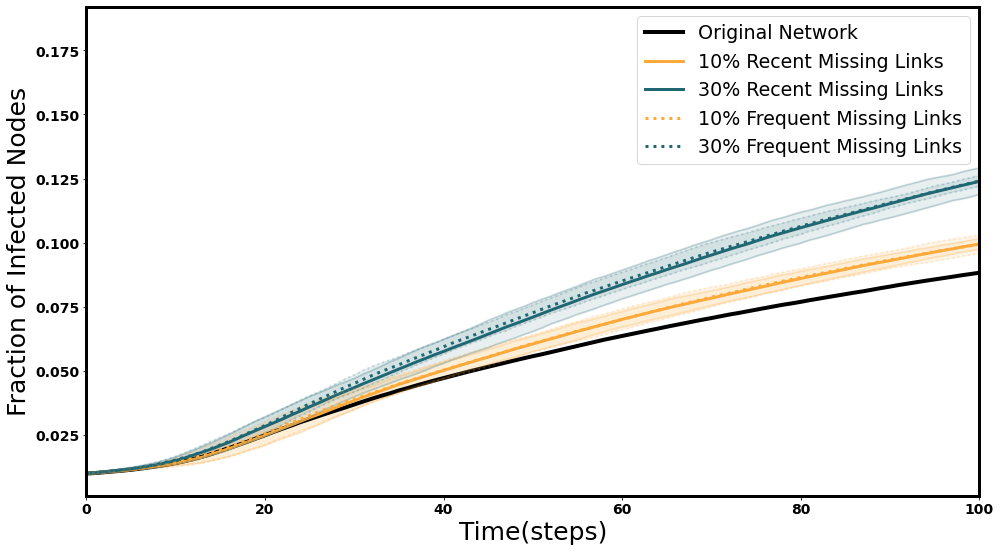

In [294]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

plt.plot(df['time'], df_mean,c='black',label='Original Network',linewidth=4.0)


plt.plot(df_un10_entire['time'], df_un10_entire_mean,label='10% Recent Missing Links',c='#FDAA3A',linewidth=3.0)
plt.fill_between(df_un10_entire['time'], df_un10_entire_min, df_un10_entire_max, color='#FDAA3A', alpha=.1)
plt.plot(df['time'], df_un10_entire_min,c='#FDAA3A',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_un10_entire_max,c='#FDAA3A',linewidth=2.0,alpha=.2)

plt.plot(df_un30_entire['time'], df_un30_entire_mean,label='30% Recent Missing Links',c='#206774',linewidth=3.0)
plt.fill_between(df_un30_entire['time'], df_un30_entire_min, df_un30_entire_max, color='#206774', alpha=.1)
plt.plot(df['time'], df_un30_entire_min,c='#206774',linewidth=2.0,alpha=.2)
plt.plot(df['time'], df_un30_entire_max,c='#206774',linewidth=2.0,alpha=.2)


plt.plot(df1_un10_entire['time'], df1_un10_entire_mean,label='10% Frequent Missing Links',c='#FDAA3A',linestyle='dotted',linewidth=3.0)
plt.fill_between(df1_un10_entire['time'], df1_un10_entire_min, df1_un10_entire_max, color='#FDAA3A', alpha=.1)
plt.plot(df['time'], df1_un10_entire_min,c='#FDAA3A',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df1_un10_entire_max,c='#FDAA3A',linewidth=2.0,linestyle='dotted',alpha=.2)

plt.plot(df1_un30_entire['time'], df1_un30_entire_mean,label='30% Frequent Missing Links',c='#206774',linestyle='dotted',linewidth=3.0)
plt.fill_between(df1_un30_entire['time'], df1_un30_entire_min, df1_un30_entire_max, color='#206774', alpha=.1)
plt.plot(df['time'], df1_un30_entire_min,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.plot(df['time'], df1_un30_entire_max,c='#206774',linewidth=2.0,linestyle='dotted',alpha=.2)
plt.xlim(0,200)
plt.xlabel('Time(step)')

fontsize = 14

for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
    tick.label1.set_fontweight('bold')
plt.rc('axes', linewidth=3) 
plt.xlabel('Time(steps)', fontsize=25)
plt.ylabel('Fraction of Infected Nodes',fontsize=25)
plt.xlim(0,100)
#plt.title('a',fontsize=20)
plt.legend(fontsize=19)
plt.savefig('real_network/real_month_july_SI_0.001_just_missing_dif1%ININ_10_30_recent_frequesnt.jpg')

# it seems the result ralated to recency and frequency are the same. So I will 
focus on one of them

# 